In [2]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

env: CUDA_VISIBLE_DEVICES=1


In [74]:
%run mylibrary.ipynb
%run mymodel.ipynb

In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math
import random
from ast import literal_eval

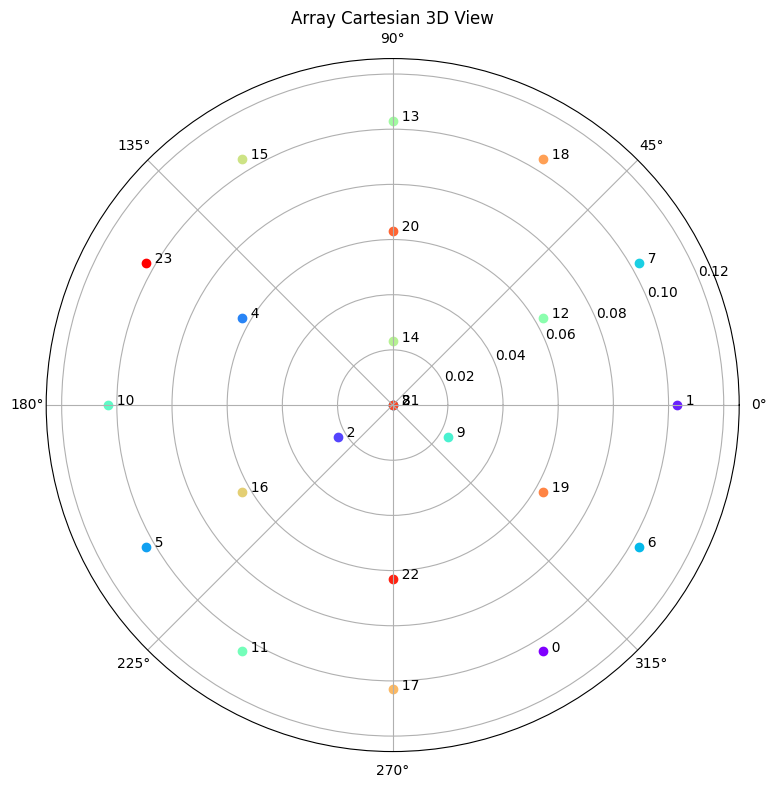

In [57]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy()
visualizer = Visualizer(AA_Geometry)
visualizer.polar(fig_size=(10,9),save_dir = 'plot/')

['random_signal_source_info_0.dat', 'random_signal_source_info_1.dat', 'random_signal_source_info_2.dat', 'random_signal_source_info_3.dat', 'random_signal_source_info_4.dat', 'random_signal_source_info_5.dat', 'random_signal_source_info_6.dat', 'random_signal_source_info_7.dat', 'random_signal_source_info_8.dat', 'random_signal_source_info_9.dat', 'random_signal_source_info_10.dat', 'random_signal_source_info_11.dat', 'random_signal_source_info_12.dat', 'random_signal_source_info_13.dat', 'random_signal_source_info_14.dat', 'random_signal_source_info_15.dat', 'random_signal_source_info_16.dat', 'random_signal_source_info_17.dat', 'random_signal_source_info_18.dat', 'random_signal_source_info_19.dat']
['random_signal_source_info_0_tau.bin', 'random_signal_source_info_1_tau.bin', 'random_signal_source_info_2_tau.bin', 'random_signal_source_info_3_tau.bin', 'random_signal_source_info_4_tau.bin', 'random_signal_source_info_5_tau.bin', 'random_signal_source_info_6_tau.bin', 'random_signal_

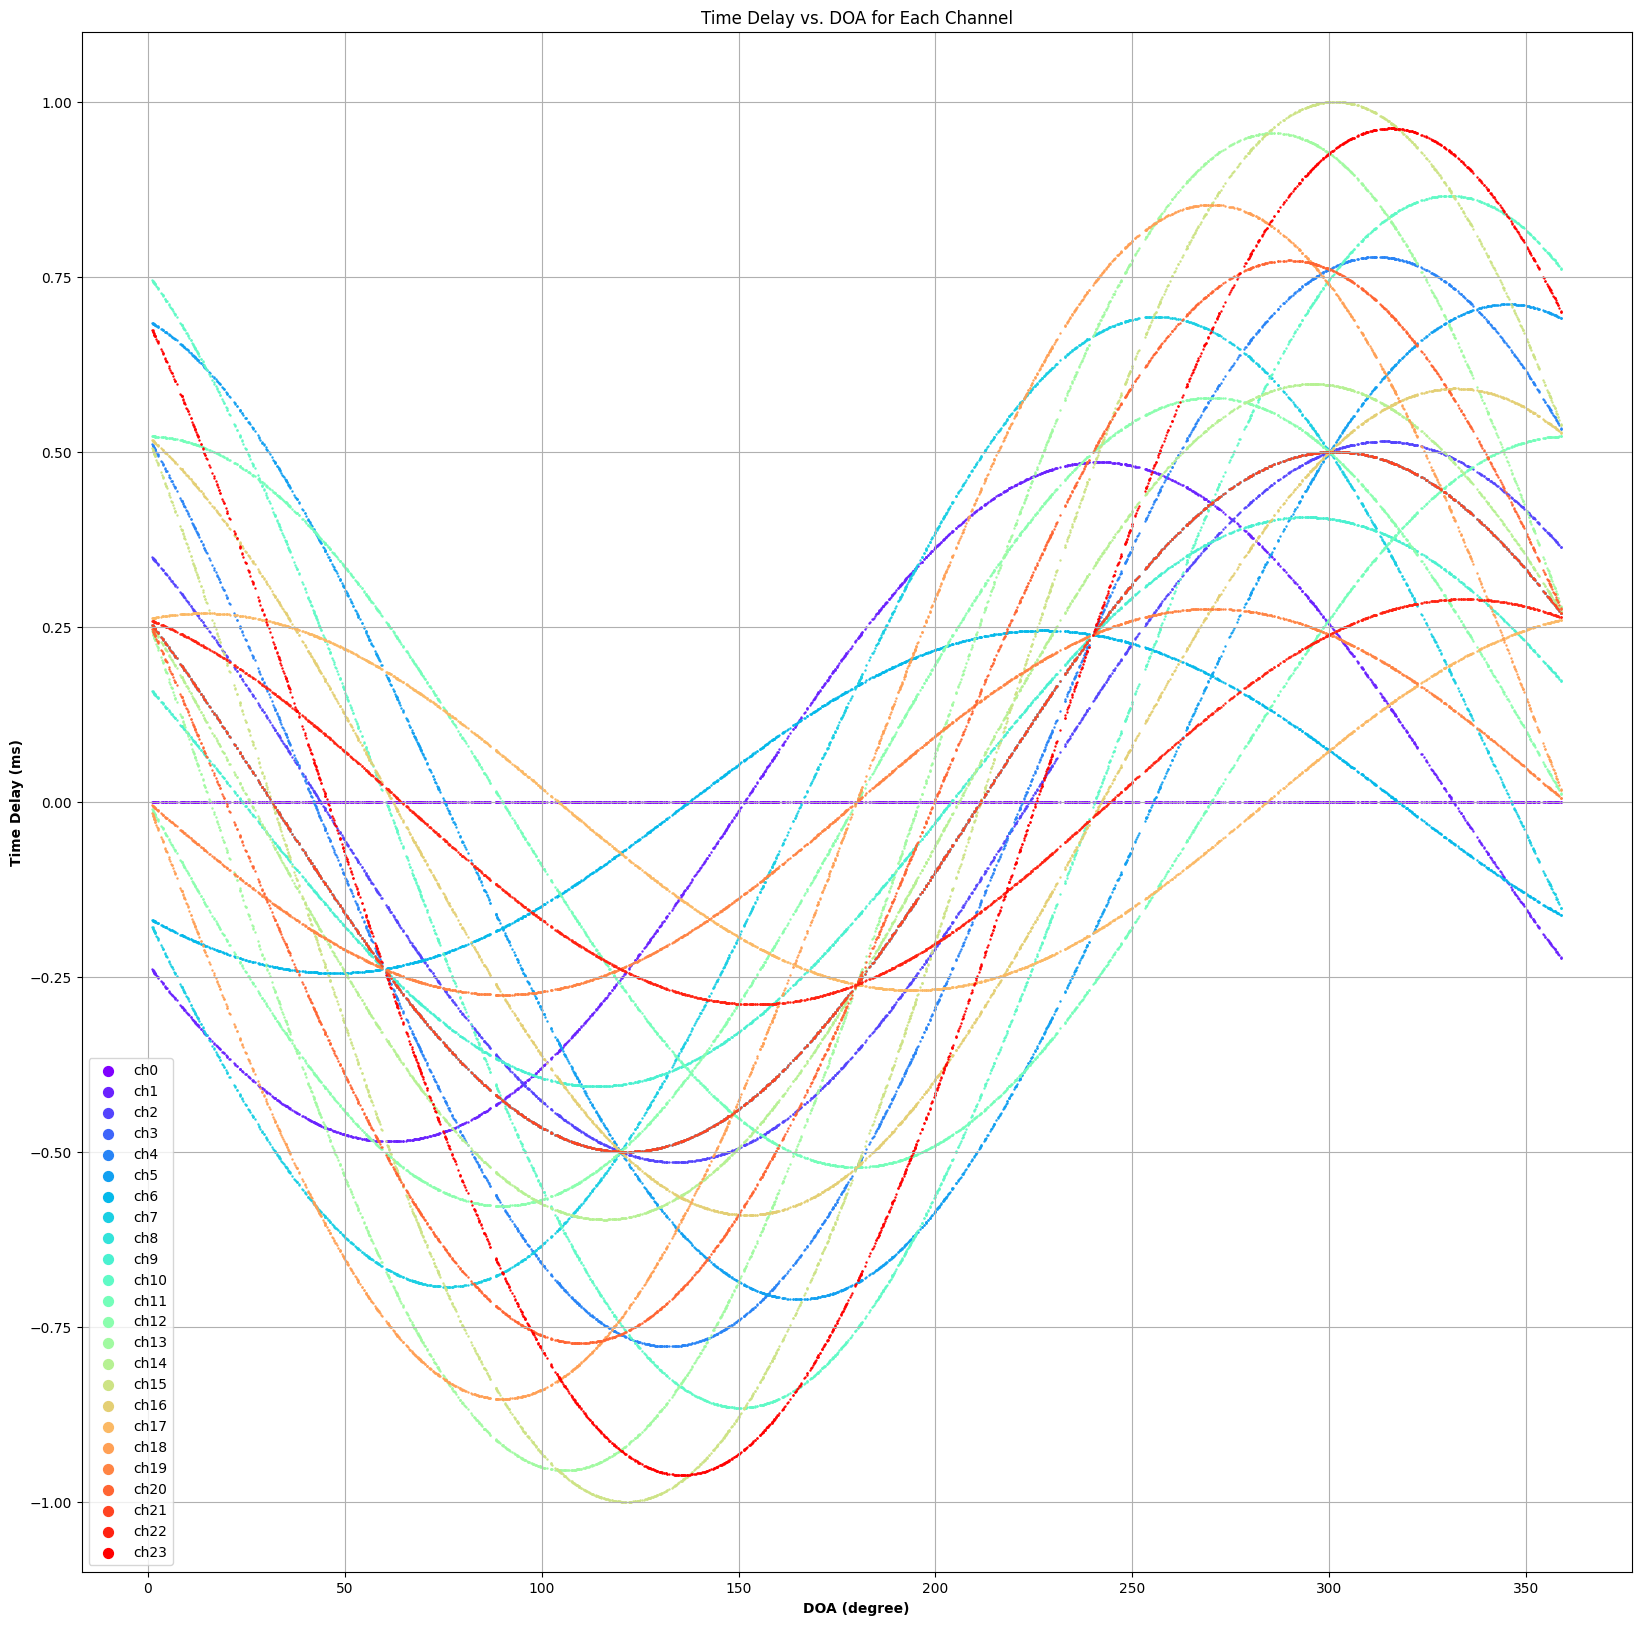

In [77]:
# Extract data from files
data = DataExtract("../data/rss360/", 24)
inputs, labels = data.get_delays_angles()
data.plot()

In [19]:
dataset = DataSetPacker(inputs, labels, list_channels[0])
train_dataset, val_dataset, test_dataset = dataset.split(shuffle=False)

2025-03-31 17:07:01.583780: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [26]:
for x,y in train_dataset.batch(32):
    print(x,y)
    break

tf.Tensor(
[[-0.19260783  0.30768555  0.29788083]
 [-0.4737422  -0.44403097 -0.3380078 ]
 [-0.19803445  0.3014142   0.29295236]
 [ 0.48468745  0.36966443  0.27036303]
 [ 0.42926654  0.5335379   0.42325032]
 [-0.44122437 -0.5177715  -0.40773103]
 [ 0.15466595 -0.34940255 -0.33043948]
 [ 0.03310752  0.50798625  0.4488868 ]
 [-0.4587513  -0.17020255 -0.09568775]
 [ 0.47459596  0.23865259  0.15478301]
 [-0.4341941  -0.09407544 -0.03081232]
 [-0.37541687  0.03884286  0.08051711]
 [-0.43044505 -0.5321299  -0.42185083]
 [ 0.19124584  0.58300614  0.49644858]
 [ 0.23013017  0.59206295  0.49977136]
 [-0.23588818  0.255368    0.25652298]
 [-0.14439327 -0.5667761  -0.48770383]
 [ 0.3320799  -0.11625129 -0.14423972]
 [ 0.433149    0.5287874   0.41854015]
 [-0.39348373  0.00241023  0.05024102]
 [ 0.4851836   0.34122264  0.24494296]
 [-0.48323372 -0.38975272 -0.2884519 ]
 [-0.40089965 -0.5603949  -0.45066366]
 [ 0.46731848  0.20383072  0.12462443]
 [-0.3145616  -0.5947387  -0.4918378 ]
 [ 0.22714251 

In [9]:
df_without_he = pd.read_csv("plot/models_evaluation_without_weights_initialization.csv")
df_with_he = pd.read_csv("plot/models_evaluation_with_weights_initialization.csv")
df_without_he_mod = pd.read_csv("plot/models_evaluation_without_he_initialization.csv")
df_with_he_mod = pd.read_csv("plot/models_evaluation_with_he_initialization.csv")
list_channels = [re.findall(r'\d+',item['Channels']) for i,item in df_without_he.iterrows()]
list_channels = [sorted([int(i) for i in ls]) for ls in list_channels]
list_channels

[[1, 14, 21],
 [12, 14, 20],
 [10, 11, 13],
 [8, 17, 22],
 [6, 11, 20],
 [7, 8, 21],
 [0, 12, 22],
 [8, 11, 13],
 [2, 10, 22],
 [7, 15, 22],
 [8, 16, 23],
 [1, 4, 14],
 [1, 5, 12],
 [7, 8, 11],
 [3, 11, 17],
 [6, 12, 13],
 [3, 7, 10],
 [4, 13, 23],
 [10, 13, 22],
 [4, 9, 15],
 [4, 16, 17],
 [3, 10, 13],
 [3, 10, 13],
 [8, 10, 15],
 [6, 16, 22],
 [15, 19, 21],
 [1, 13, 19],
 [5, 18, 21],
 [3, 4, 21],
 [7, 9, 11],
 [8, 15, 17],
 [0, 7, 18],
 [1, 14, 21],
 [17, 20, 22],
 [5, 13, 14],
 [4, 14, 22],
 [0, 15, 23],
 [5, 15, 23],
 [3, 7, 10],
 [0, 2, 12],
 [2, 10, 19],
 [3, 9, 20],
 [6, 15, 21],
 [3, 12, 20],
 [10, 12, 13],
 [0, 7, 17],
 [10, 11, 18],
 [13, 14, 16],
 [5, 12, 22],
 [15, 19, 23],
 [0, 2, 4, 6, 14, 23],
 [2, 4, 5, 6, 10, 16],
 [1, 5, 6, 15, 16, 22],
 [2, 5, 9, 13, 17, 22],
 [2, 10, 12, 14, 20, 23],
 [5, 6, 7, 13, 19, 23],
 [5, 11, 13, 15, 21, 22],
 [3, 8, 14, 15, 16, 17],
 [10, 14, 16, 17, 20, 21],
 [0, 1, 2, 13, 14, 15],
 [0, 2, 5, 7, 9, 18],
 [2, 3, 9, 10, 11, 15],
 [4, 8, 9, 1

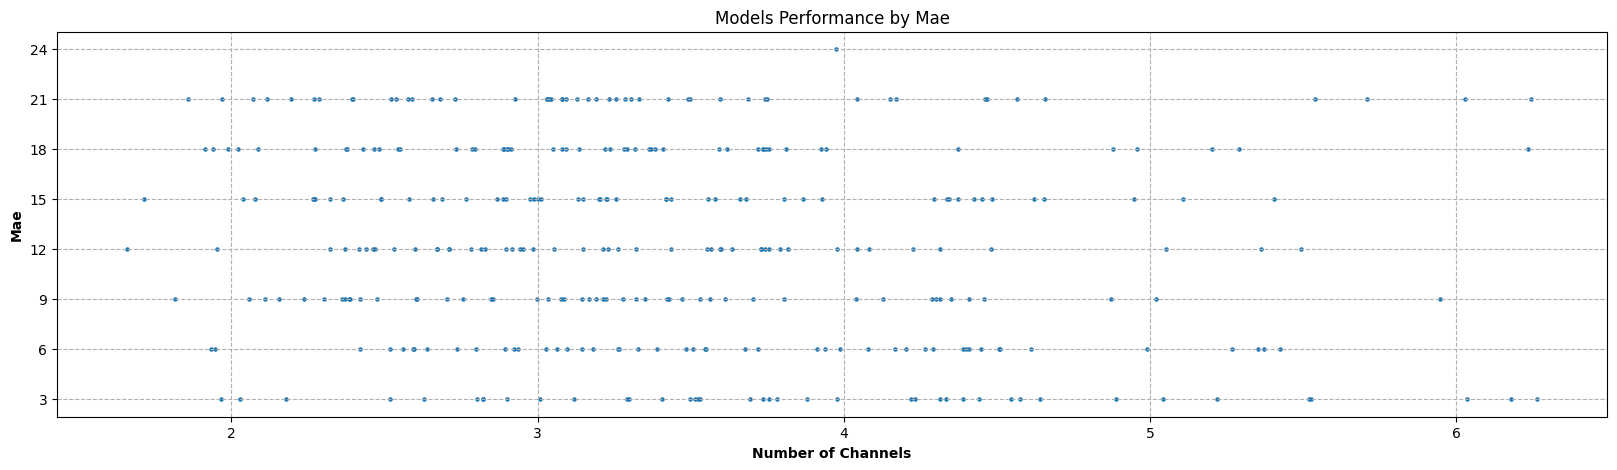

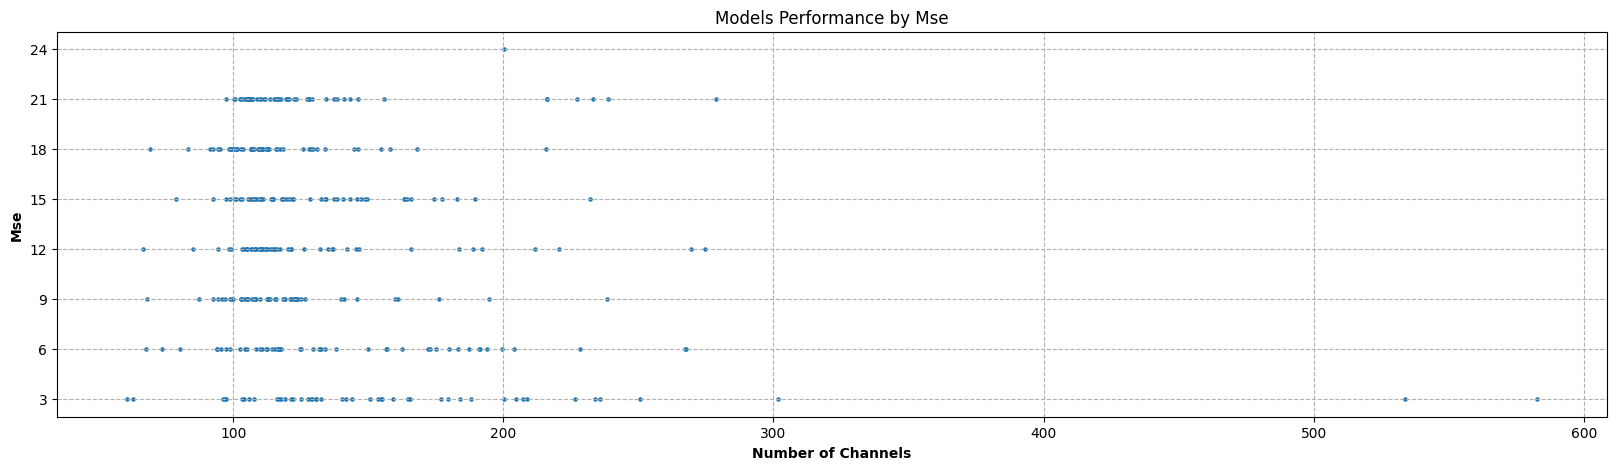

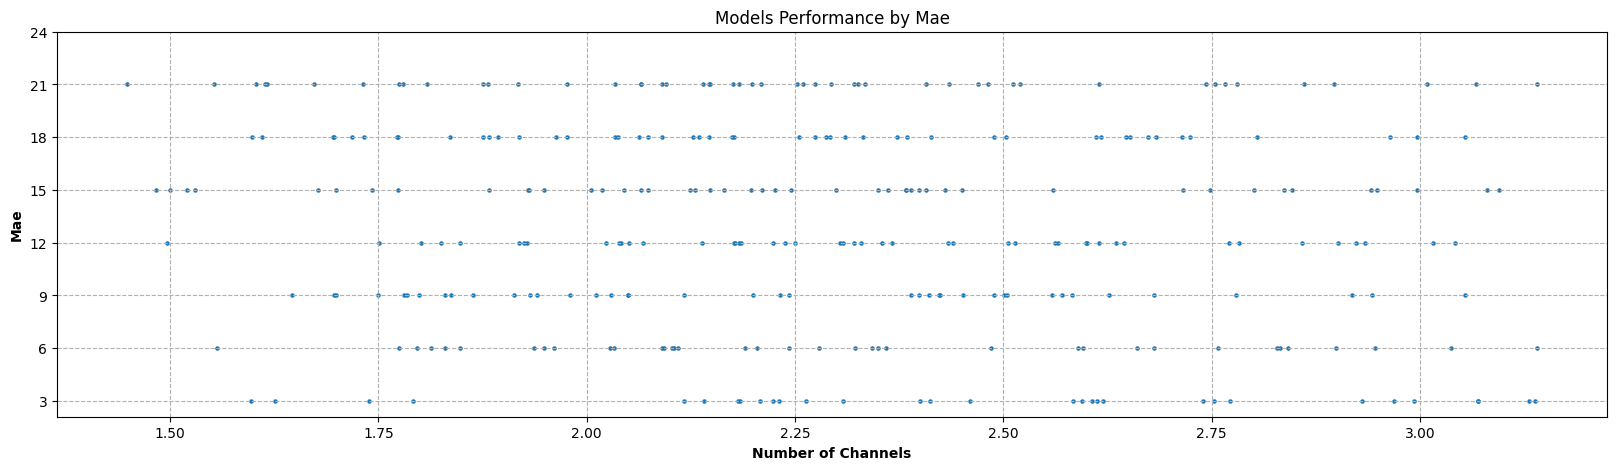

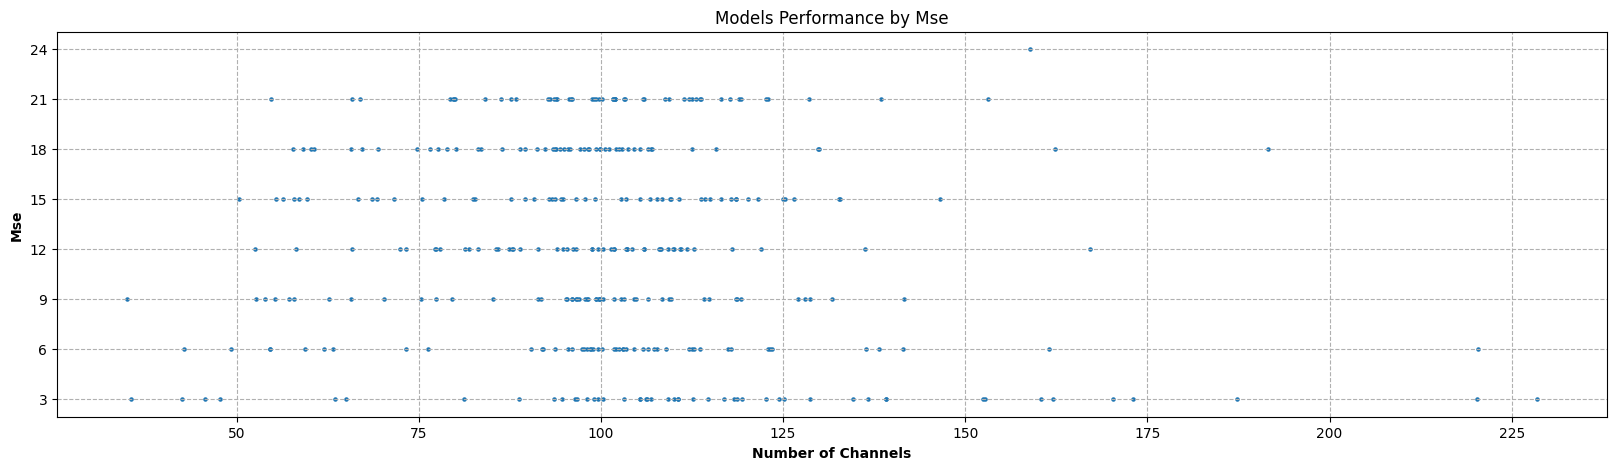

In [13]:
# ignore large outlier
plot_table(df_without_he, 'Mae', threshold = 0.01)
plot_table(df_without_he, 'Mse', threshold = 0.01)
plot_table(df_with_he, 'Mae', threshold = 0.01)
plot_table(df_with_he, 'Mse', threshold = 0.01)

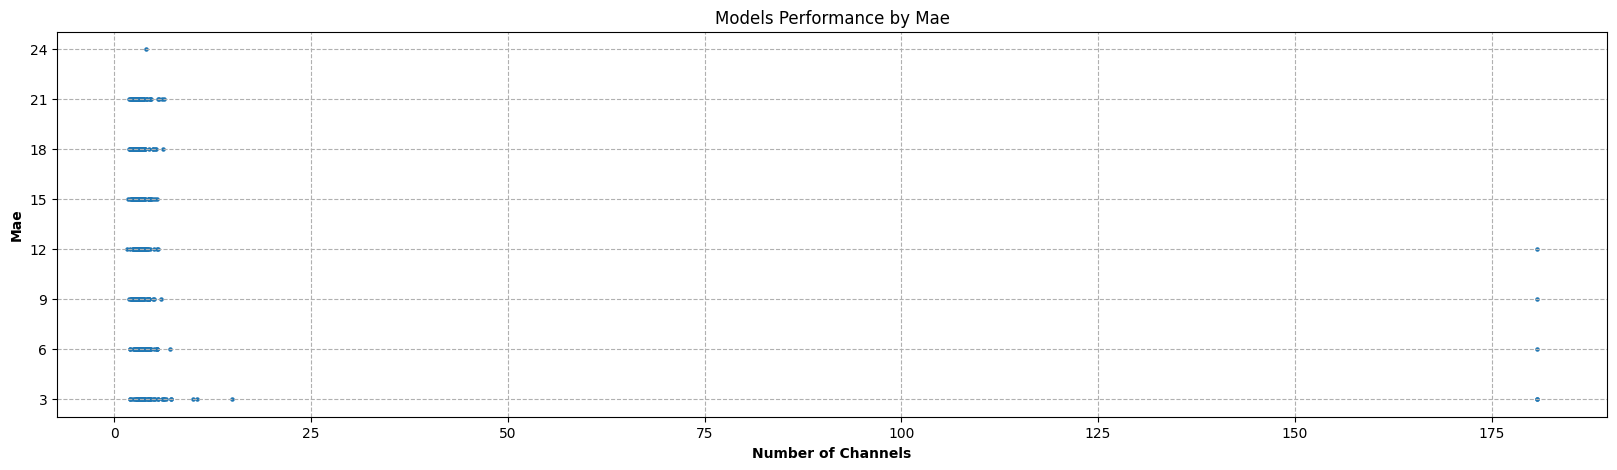

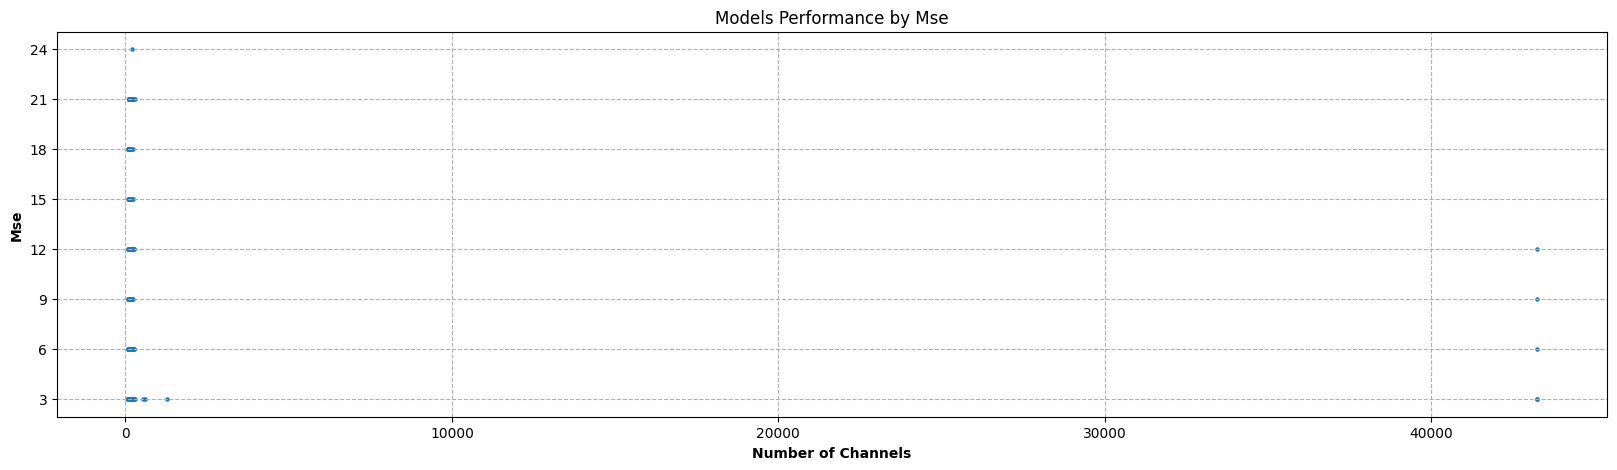

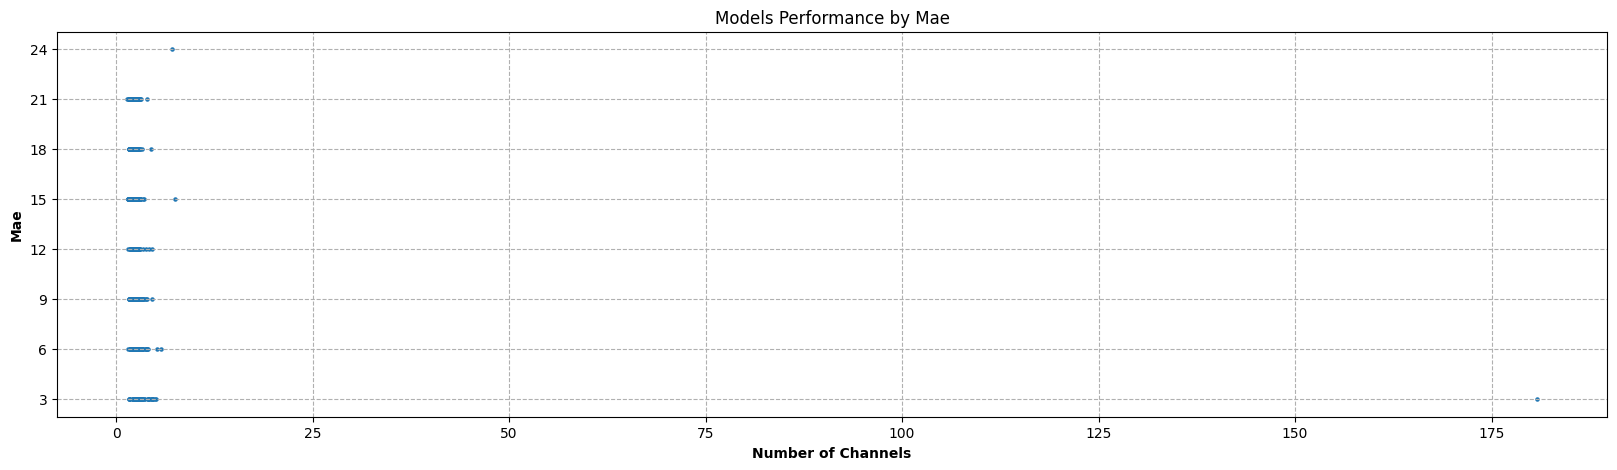

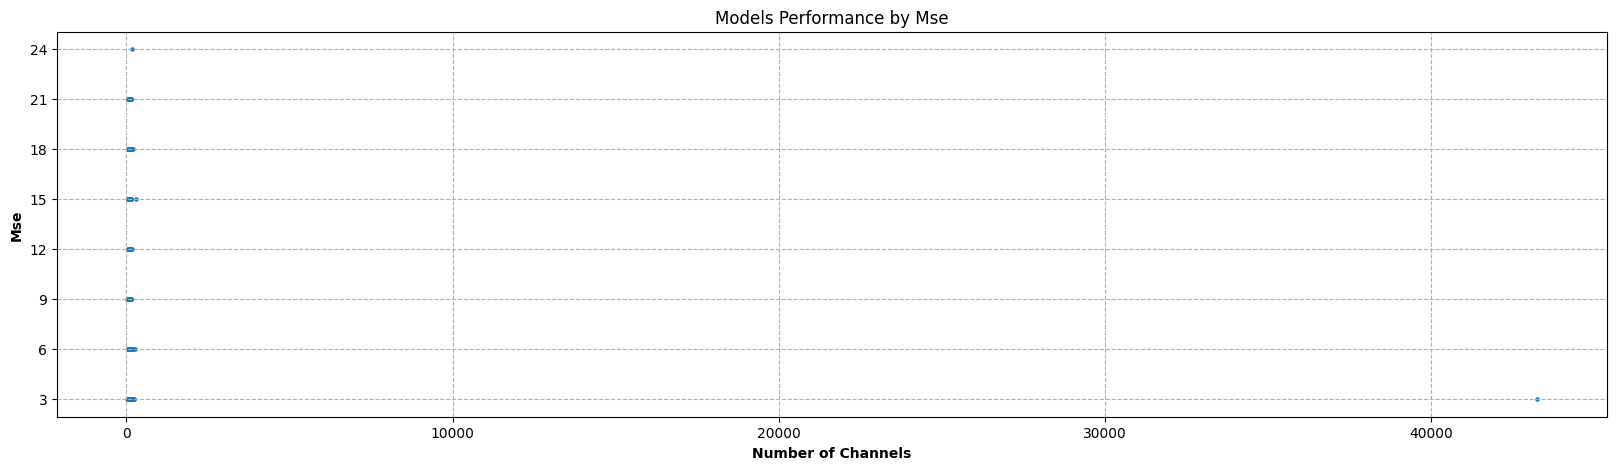

In [14]:
# include large outlier
plot_table(df_without_he, 'Mae', threshold = 100)
plot_table(df_without_he, 'Mse', threshold = 100)
plot_table(df_with_he, 'Mae', threshold = 100)
plot_table(df_with_he, 'Mse', threshold = 100)

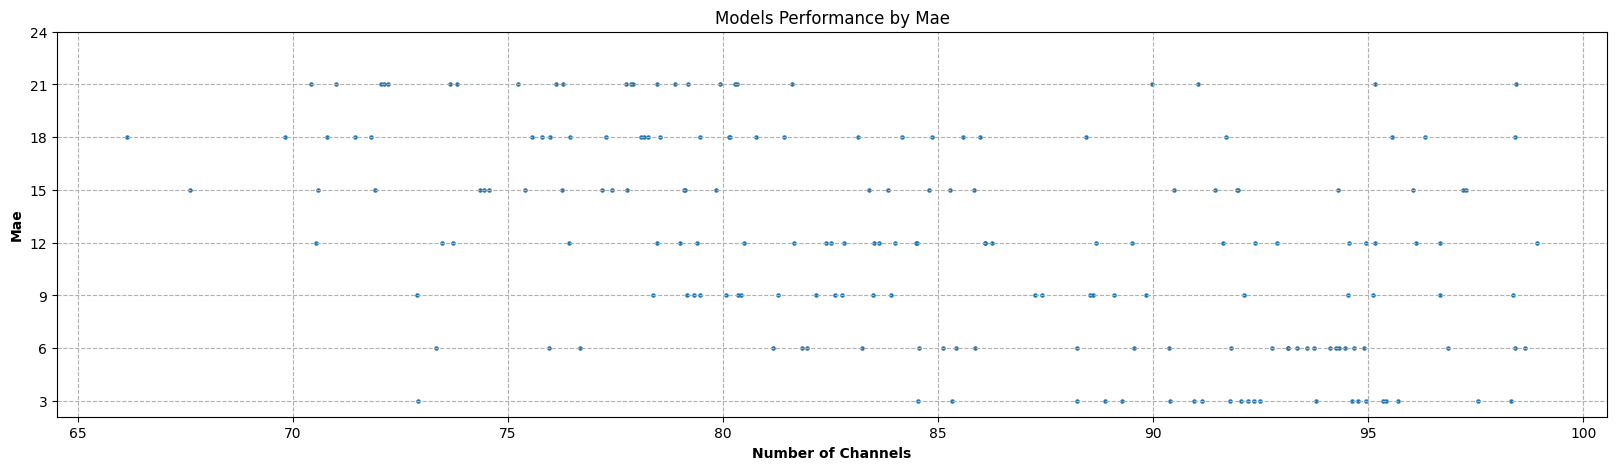

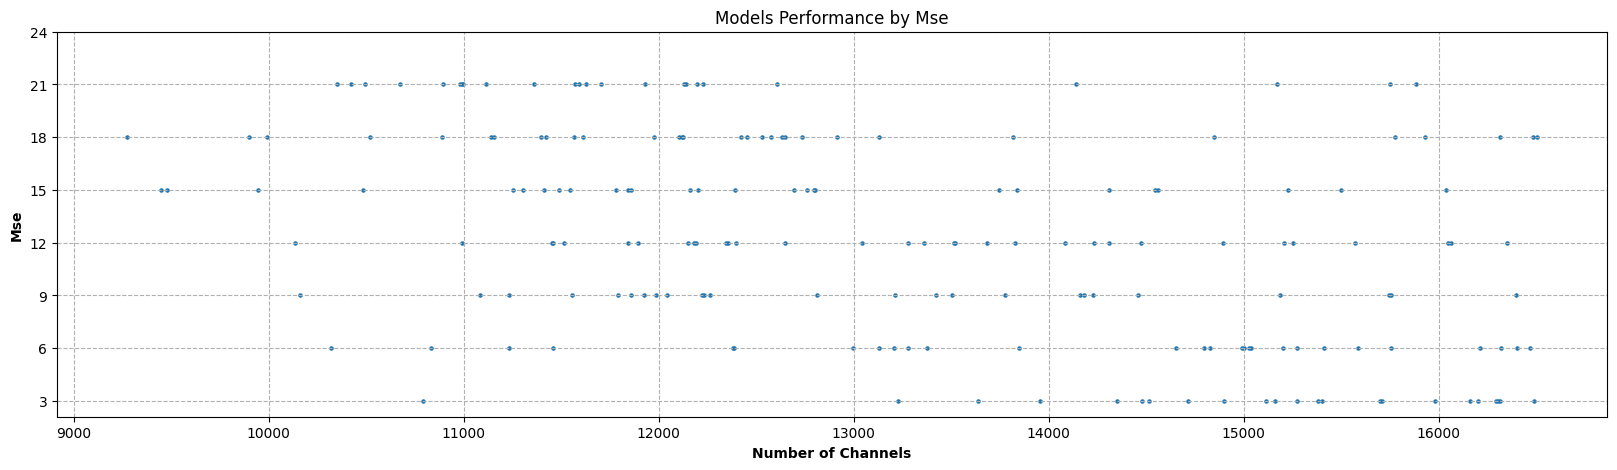

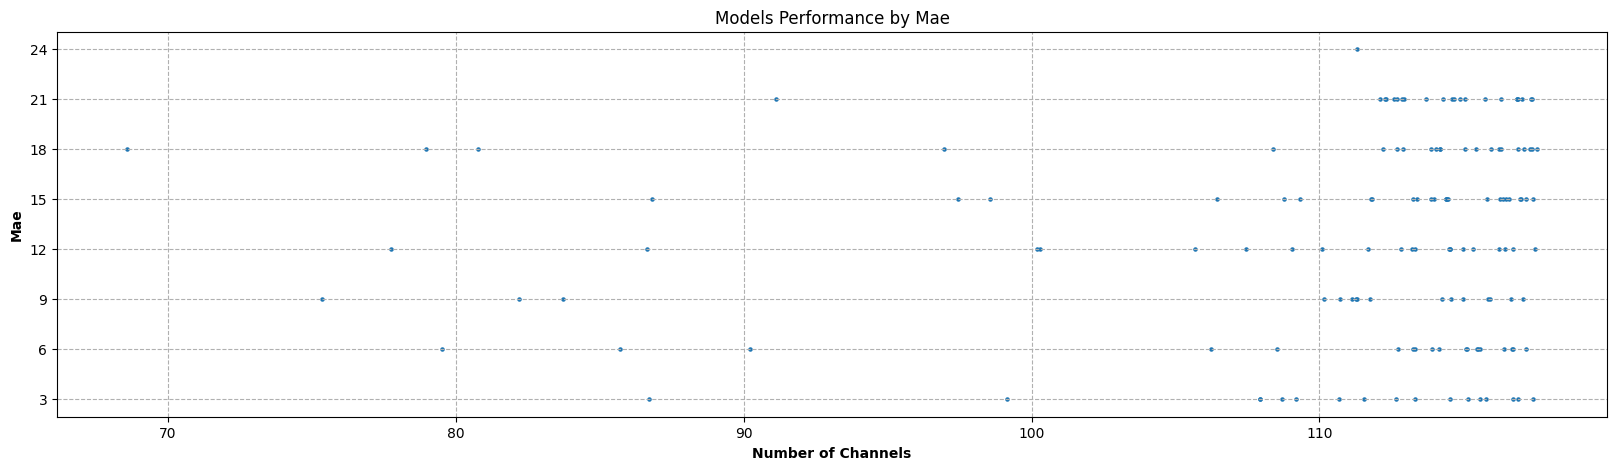

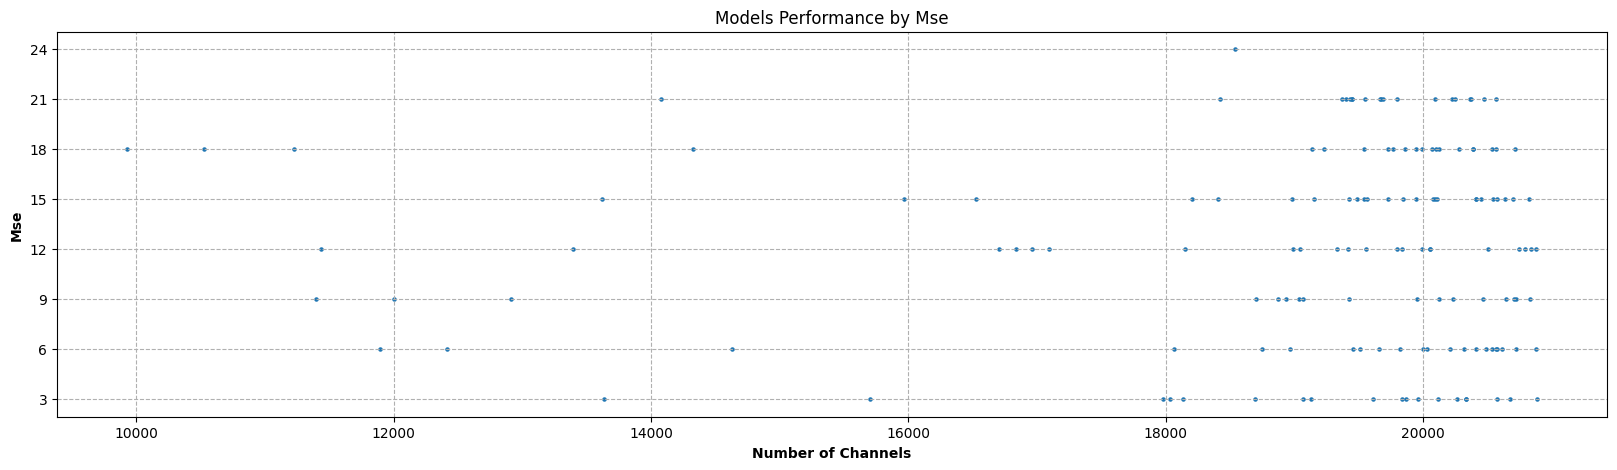

In [15]:
# ignore large outlier
plot_table(df_without_he_mod, 'Mae', threshold = 0.01)
plot_table(df_without_he_mod, 'Mse', threshold = 0.01)
plot_table(df_with_he_mod, 'Mae', threshold = 0.01)
plot_table(df_with_he_mod, 'Mse', threshold = 0.01)

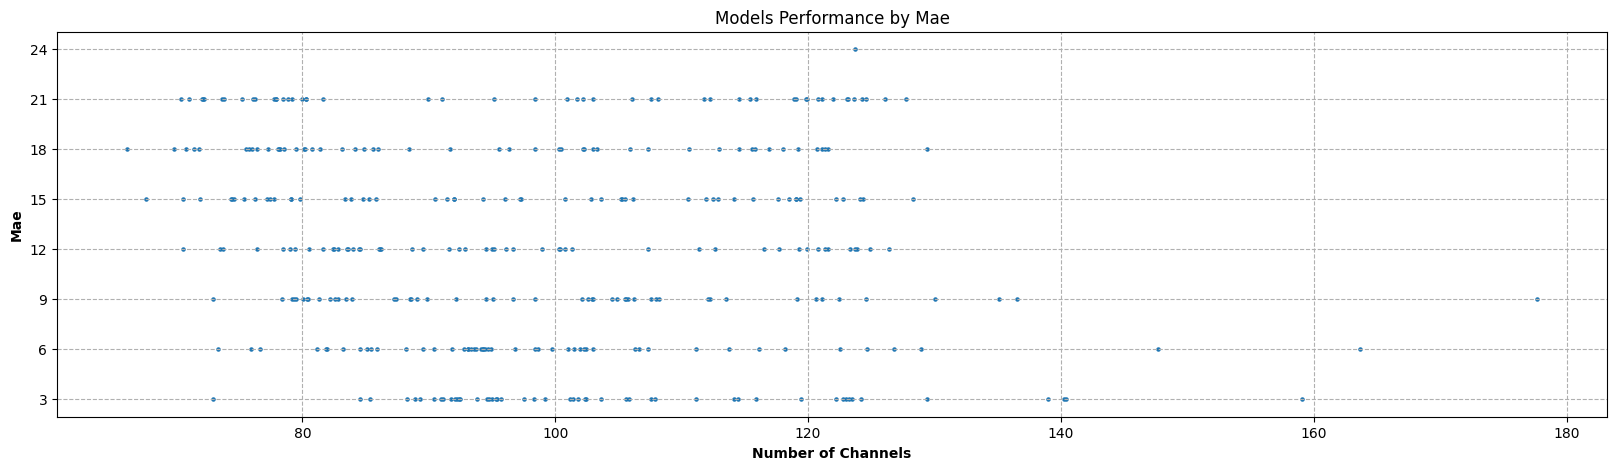

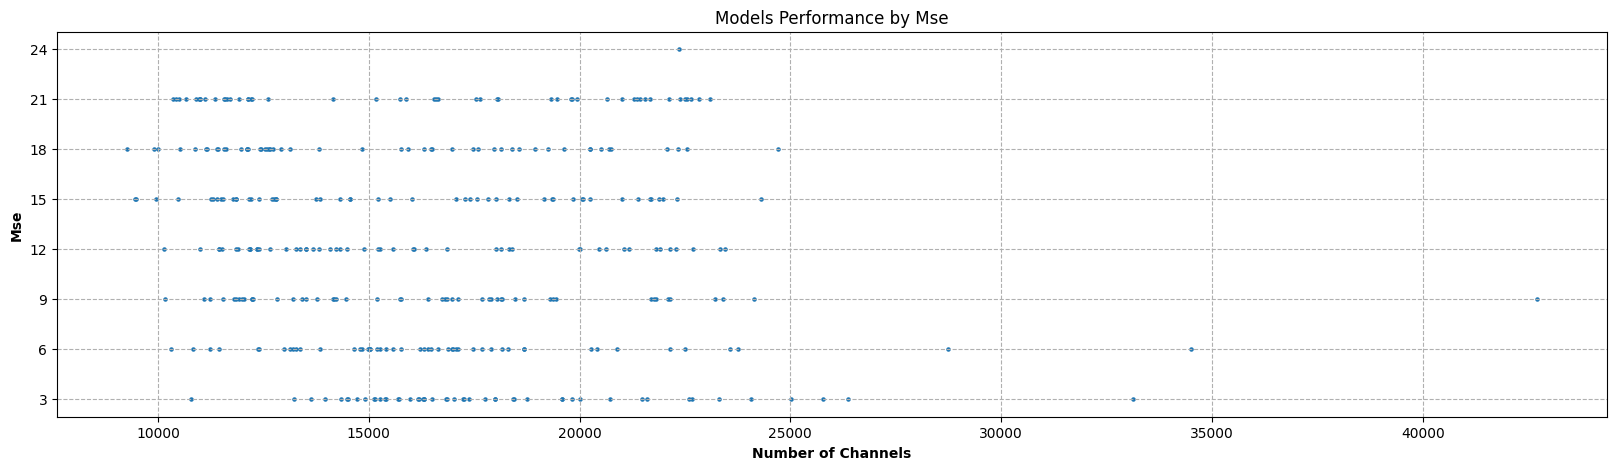

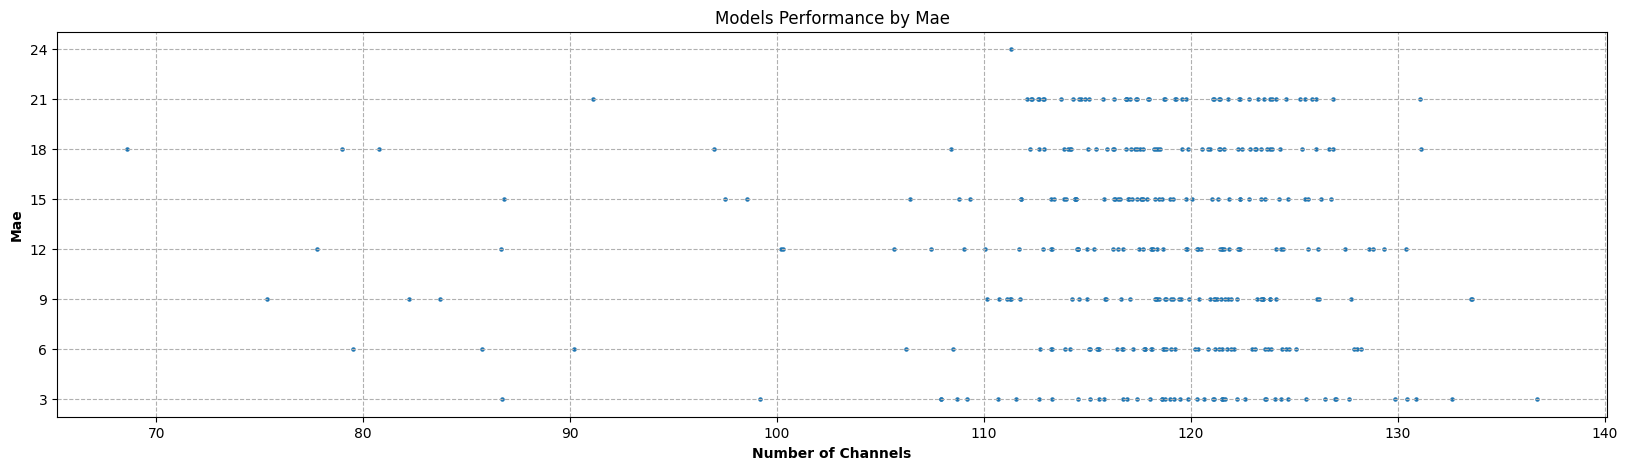

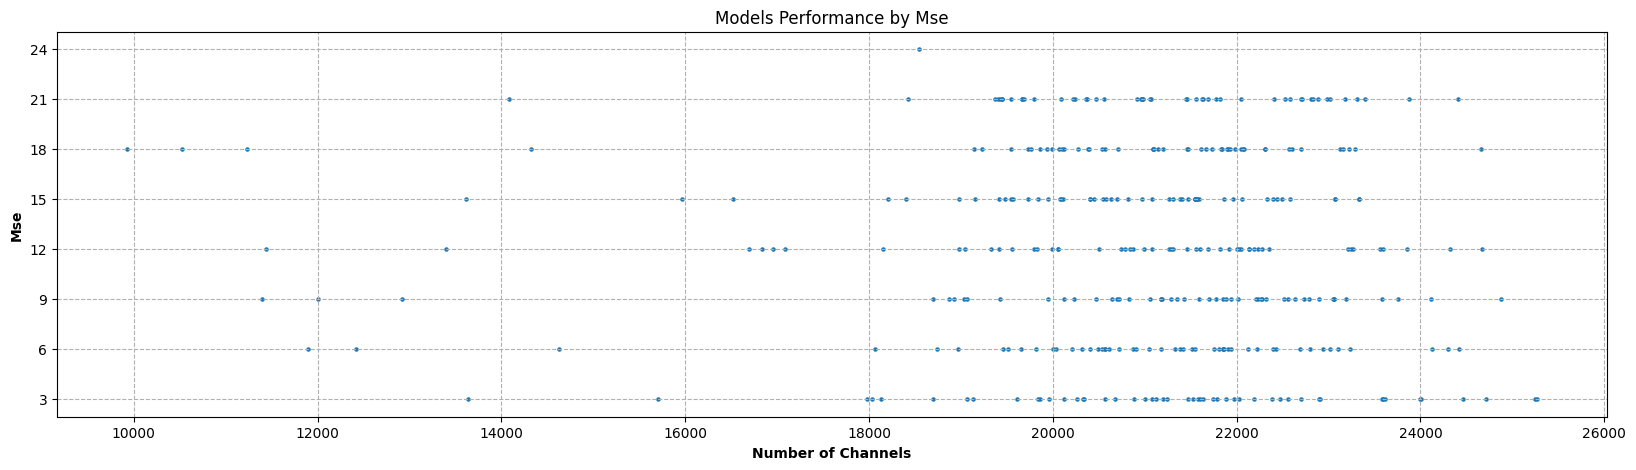

In [17]:
# include large outlier
plot_table(df_without_he_mod, 'Mae', threshold = 1000)
plot_table(df_without_he_mod, 'Mse', threshold = 1000)
plot_table(df_with_he_mod, 'Mae', threshold = 1000)
plot_table(df_with_he_mod, 'Mse', threshold = 1000)

In [35]:
# Get the list of channels with loss less than 75
# The 75 is a convience number from the results
top_without_he =  df_without_he.index[df_without_he['Loss'] < 75].tolist()
top_list_channels = [list_channels[i] for i in top_without_he]
top_list_channels

[[6, 12, 13],
 [10, 12, 13],
 [1, 3, 12, 18, 20, 23],
 [8, 12, 16, 18, 21, 22],
 [2, 6, 8, 9, 12, 15, 18, 20, 22],
 [1, 2, 3, 6, 7, 12, 14, 18, 19, 20, 21, 22],
 [1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 18, 19, 20, 21, 23]]

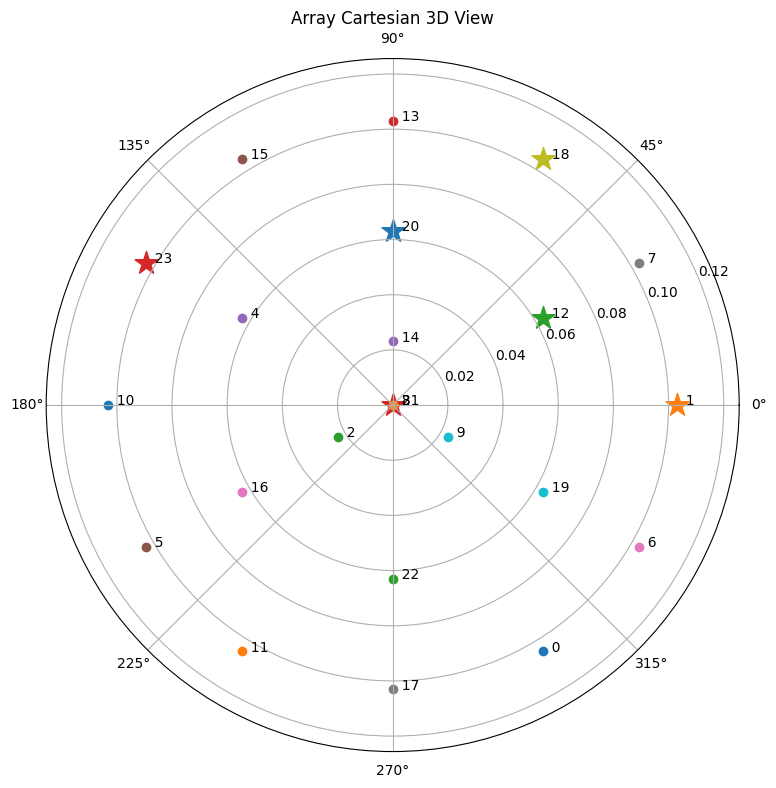

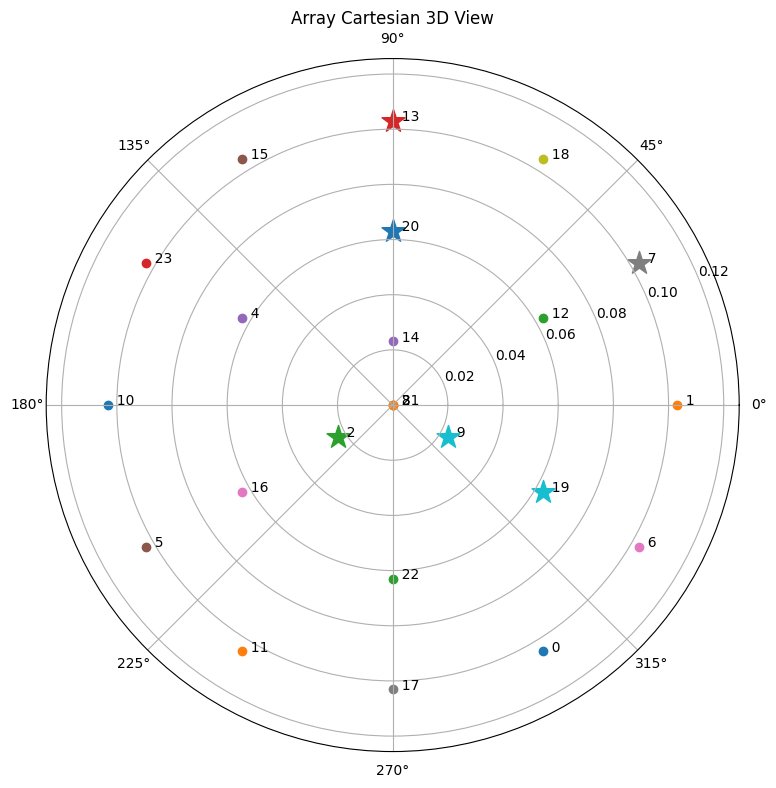

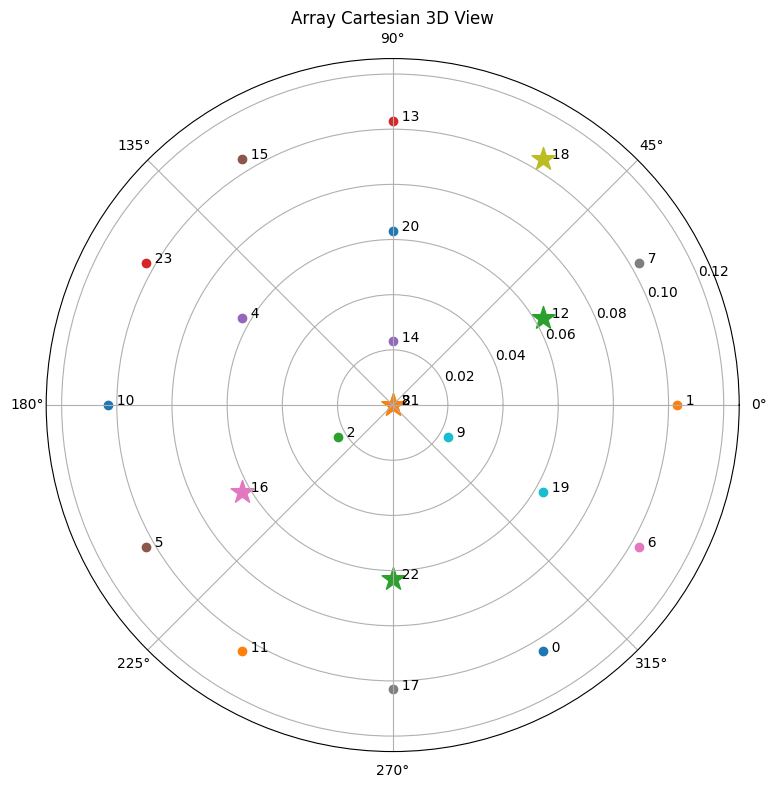

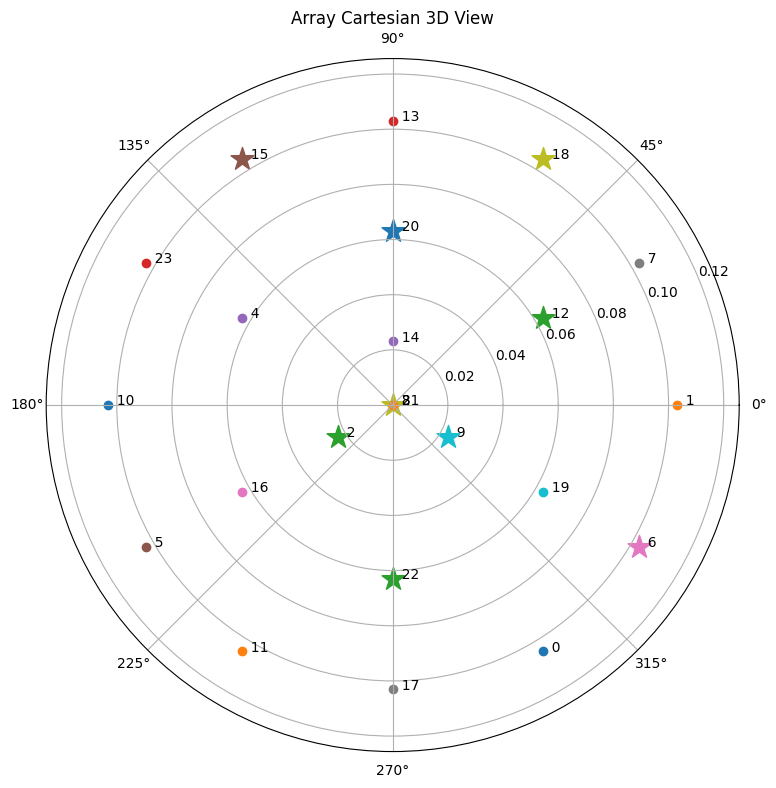

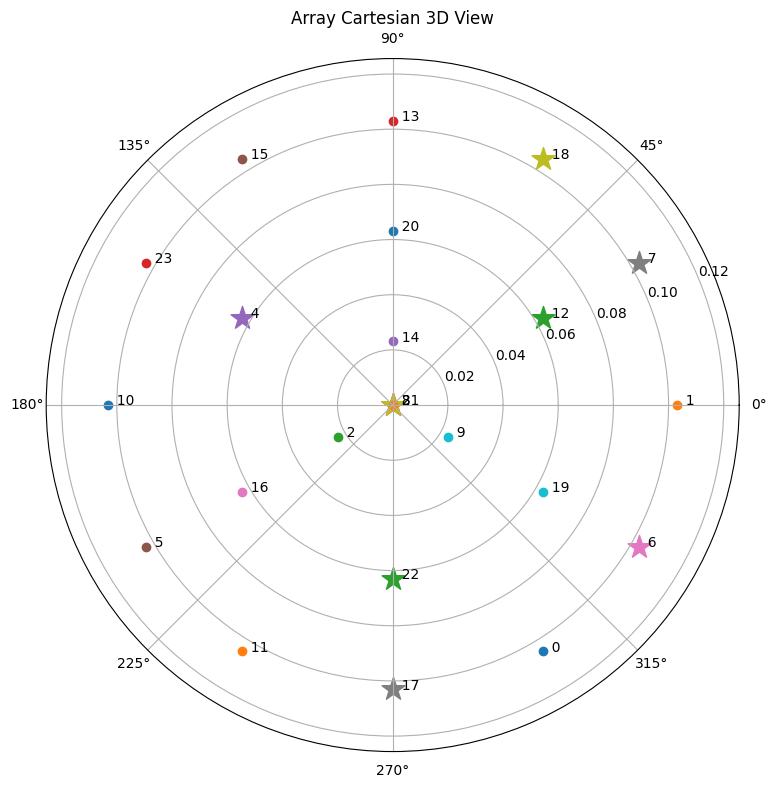

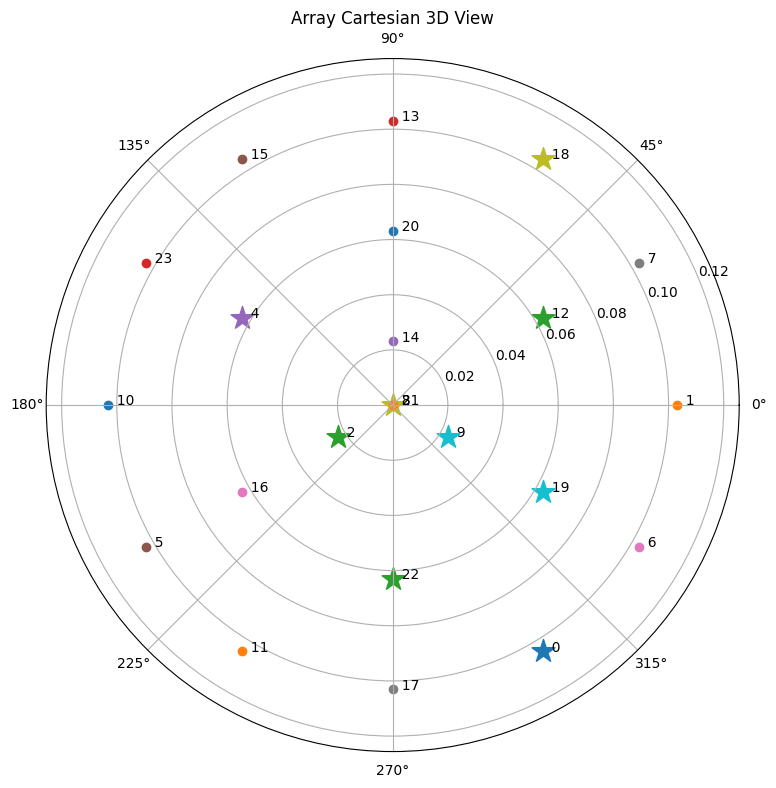

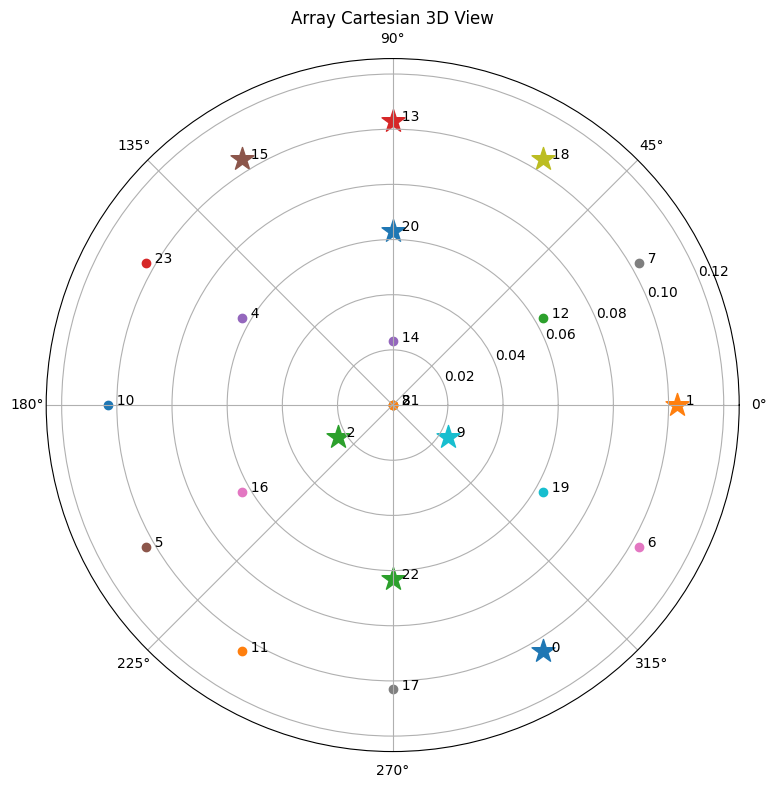

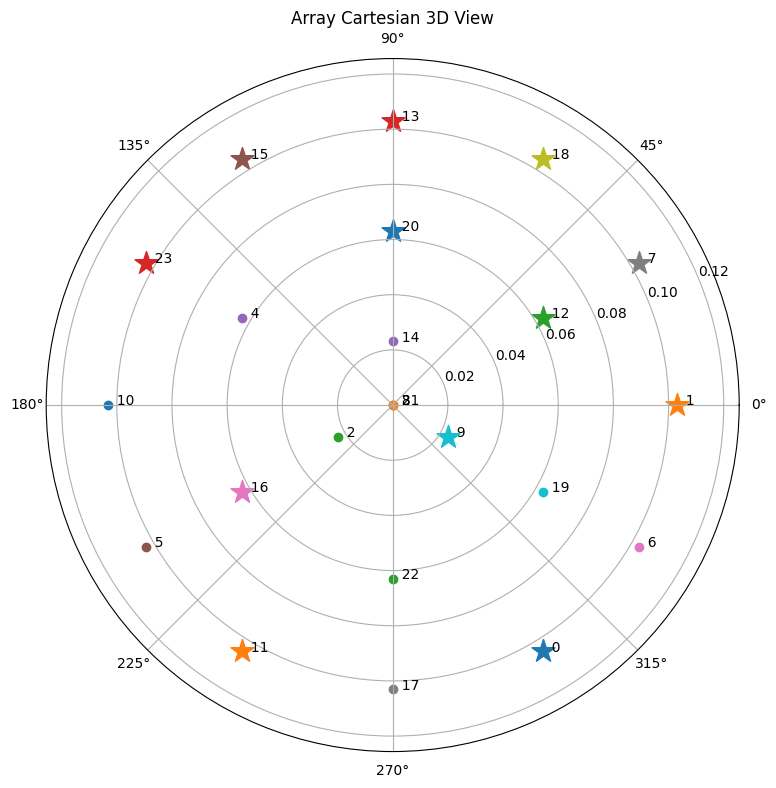

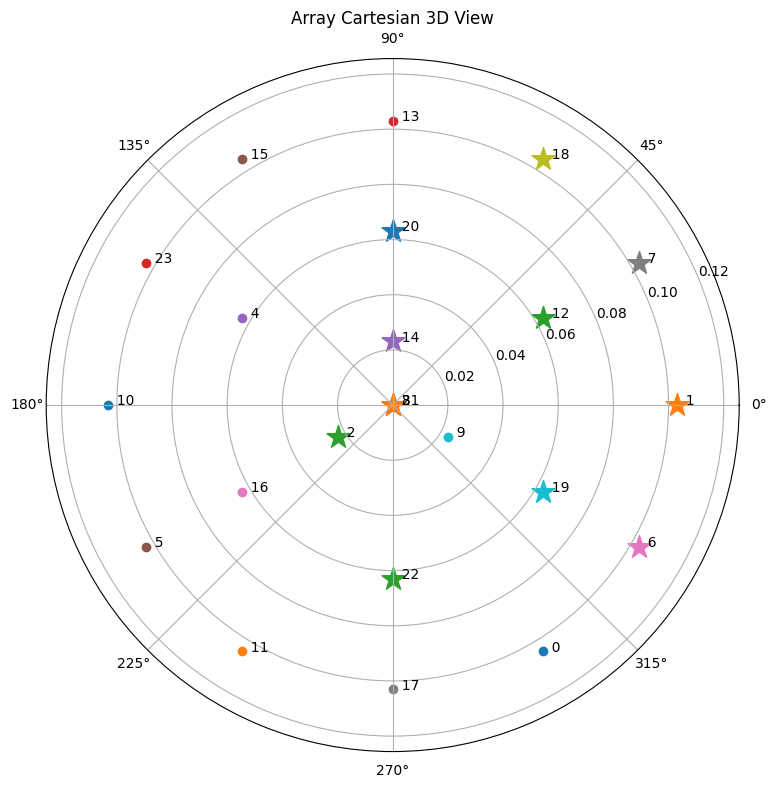

In [222]:
for channels in top_list_channels:
    visualizer.polar(fig_size=(10,9), channels = channels)

[[0.006843581795692444, 458.61358642578125, 2.617692232131958]]

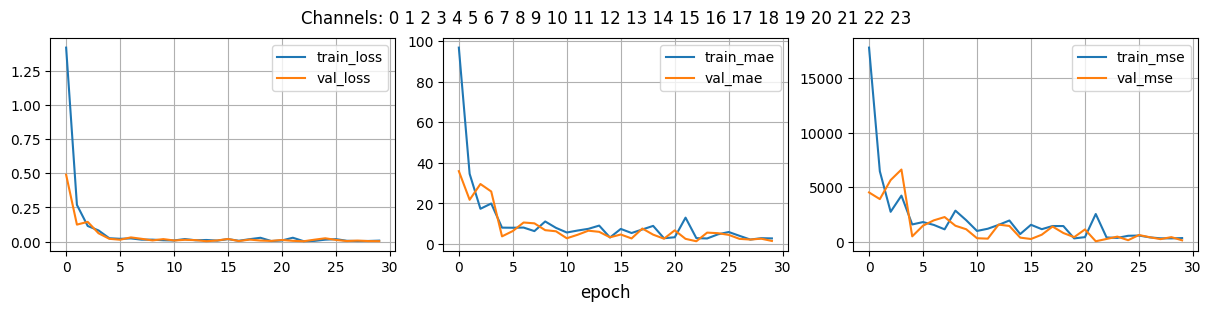

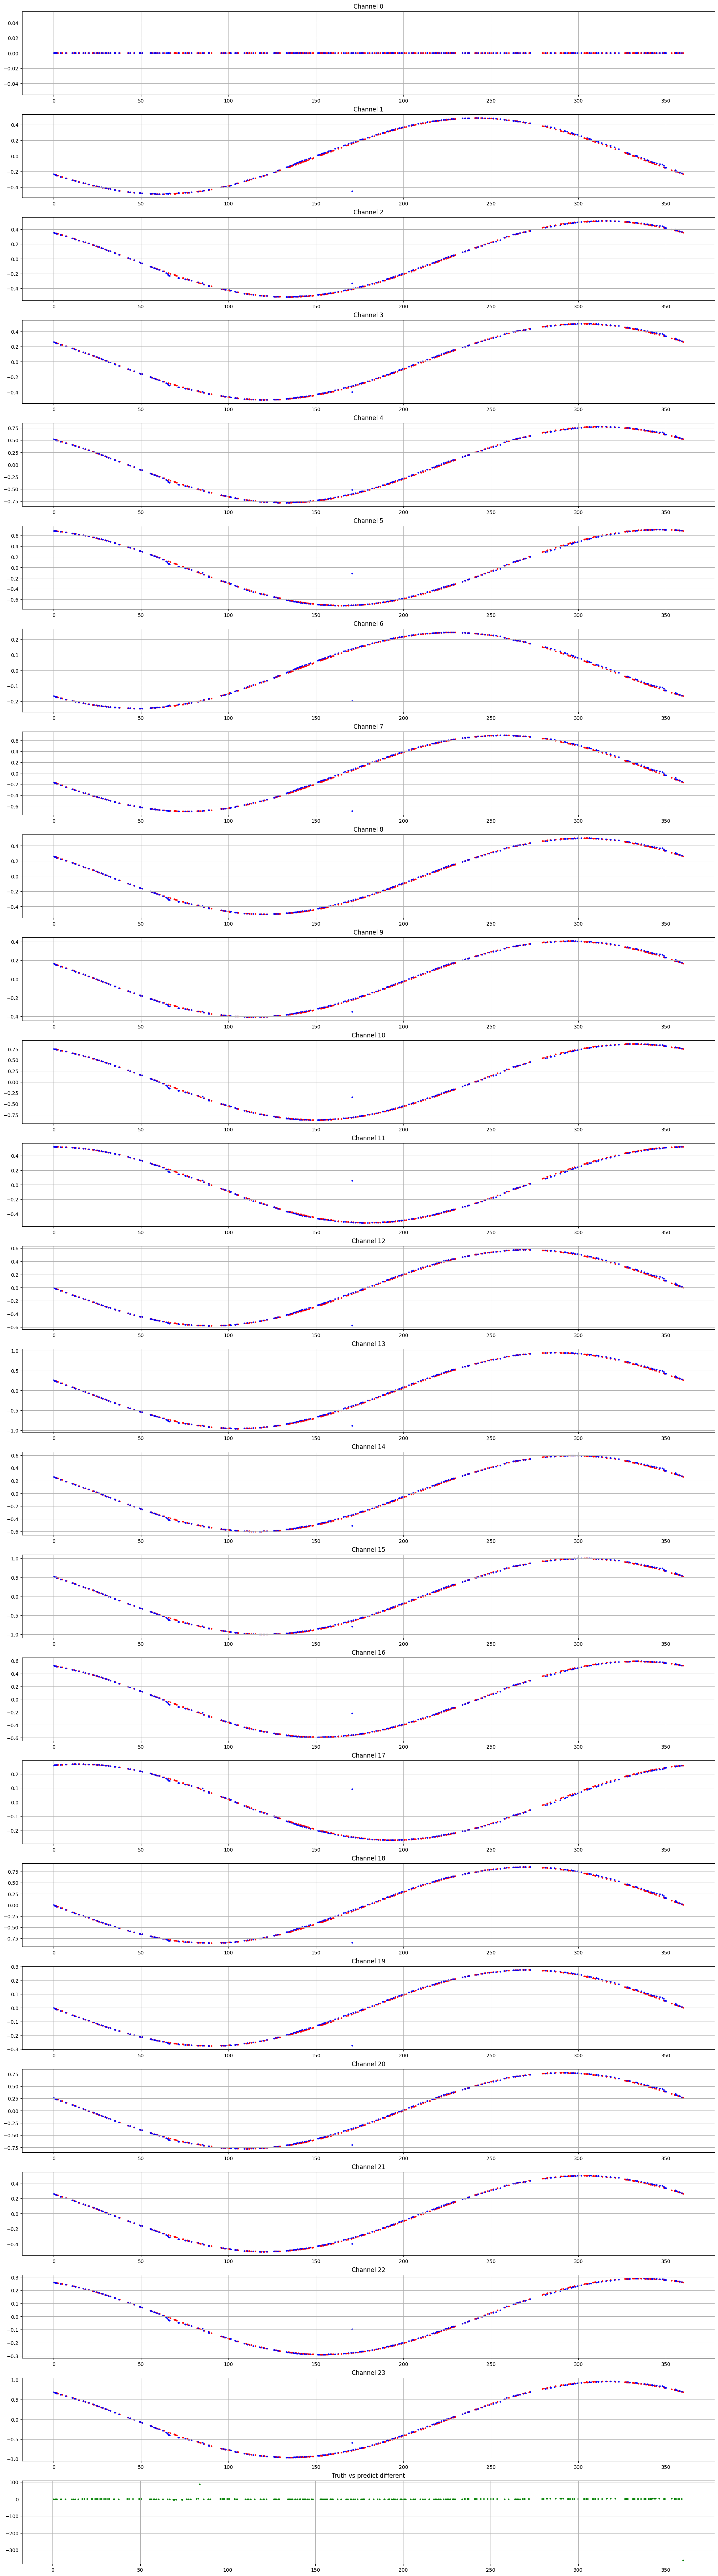

In [155]:
models, evaluates, losses = training_evaluation("relu", [list(range(0,24))], inputs, labels, epochs=30, plot=True)
evaluates

2025-03-31 00:52:08.557061: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[[0.00011021281534340233, 0.36233842372894287, 0.2549373507499695],
 [0.00013325094187166542, 0.4374663233757019, 0.48724356293678284],
 [0.031213220208883286, 2224.30078125, 11.831103324890137],
 [0.01516907662153244, 512.9459838867188, 4.2343597412109375],
 [0.0018917425768449903, 1712.2921142578125, 6.845765113830566],
 [1.2897248780063819e-05, 0.04233952611684799, 0.13130681216716766],
 [3.739071689778939e-05, 0.12274827063083649, 0.2669123113155365]]

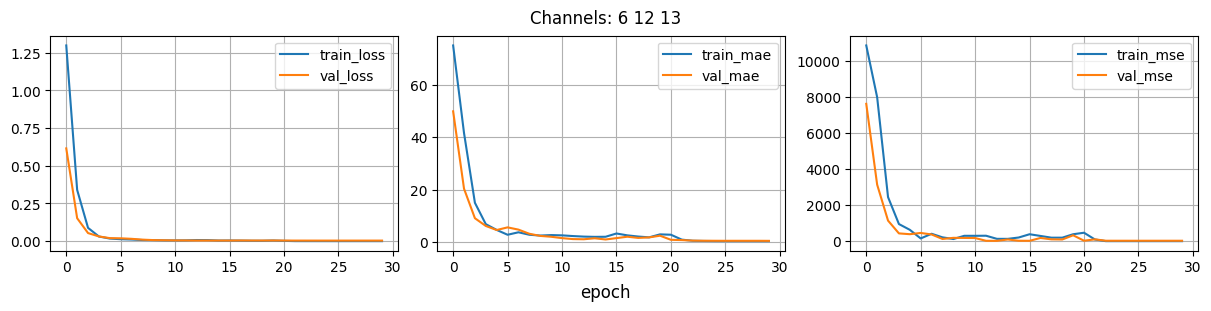

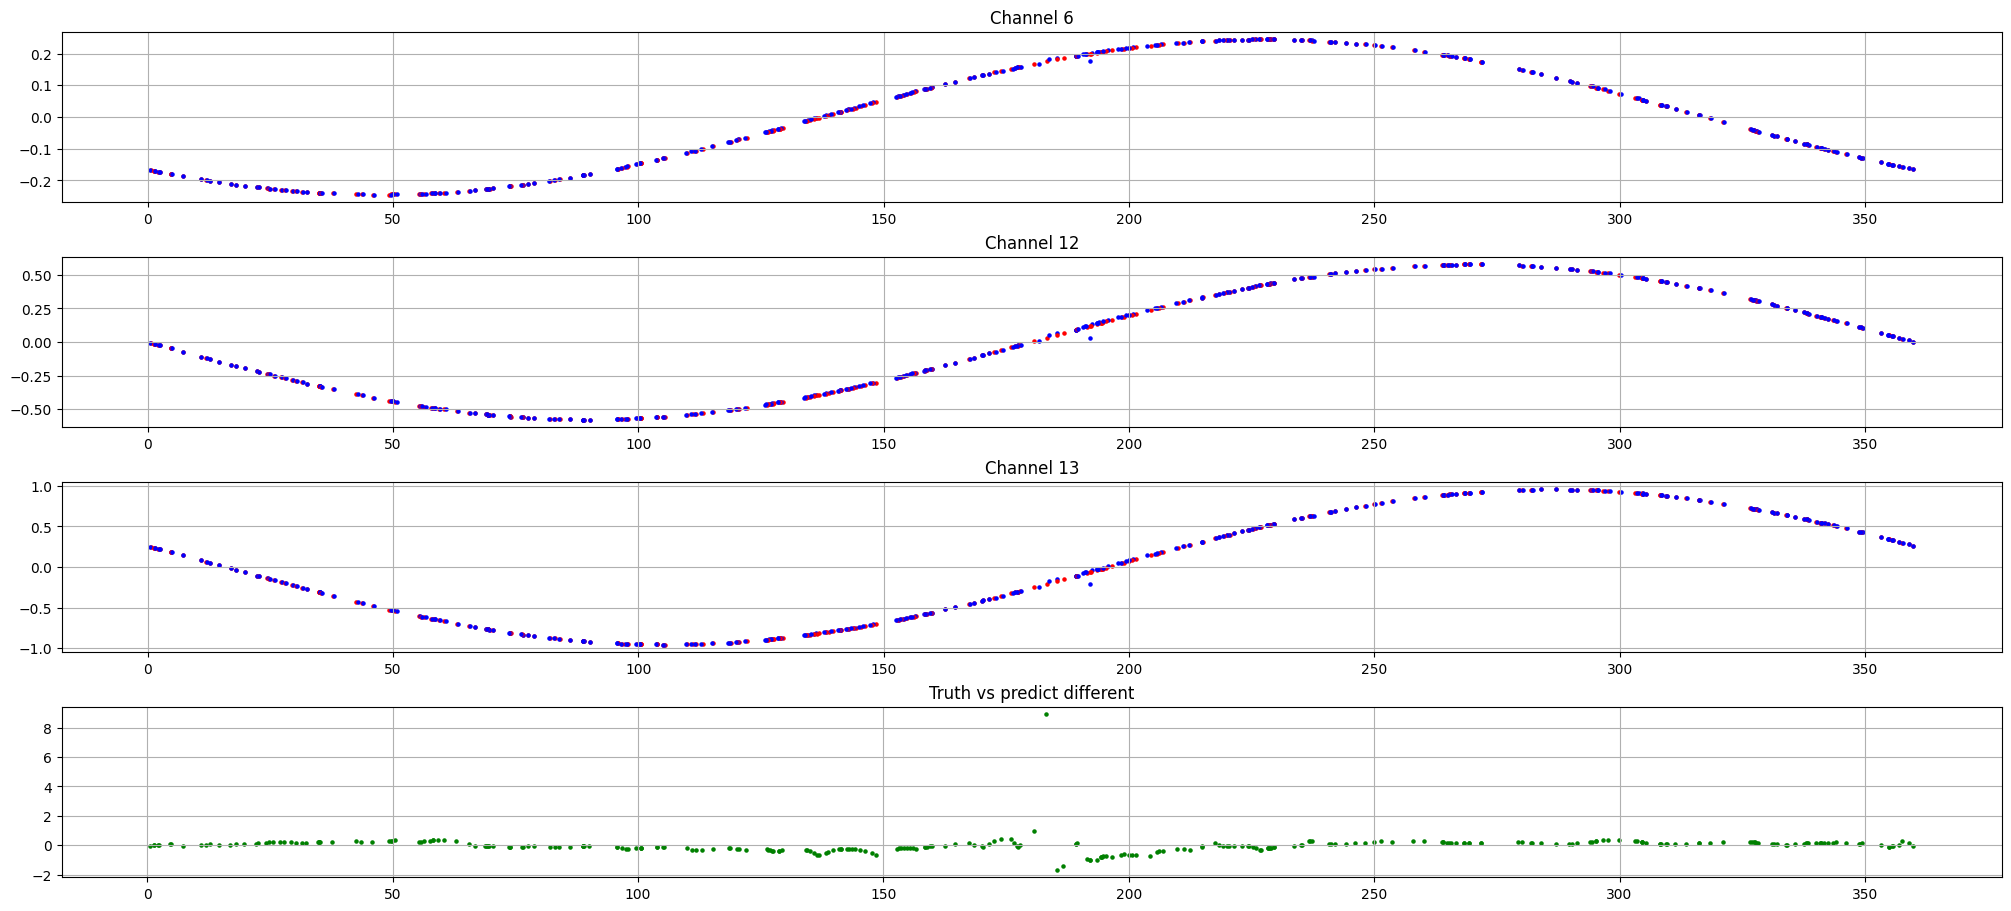

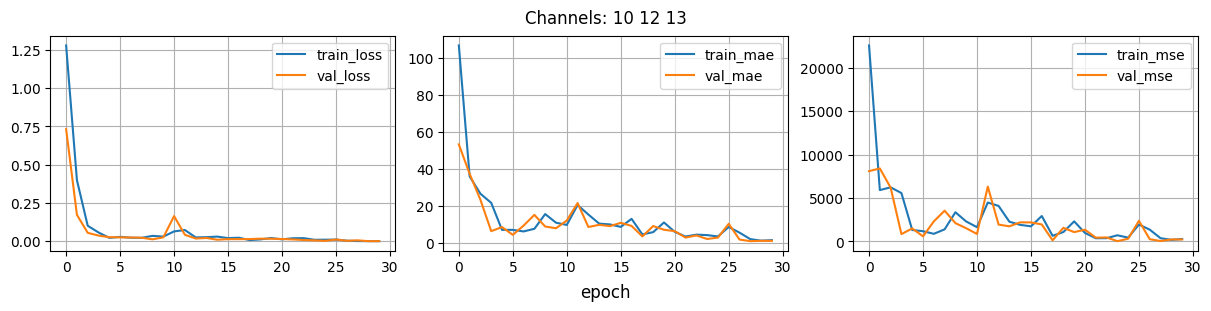

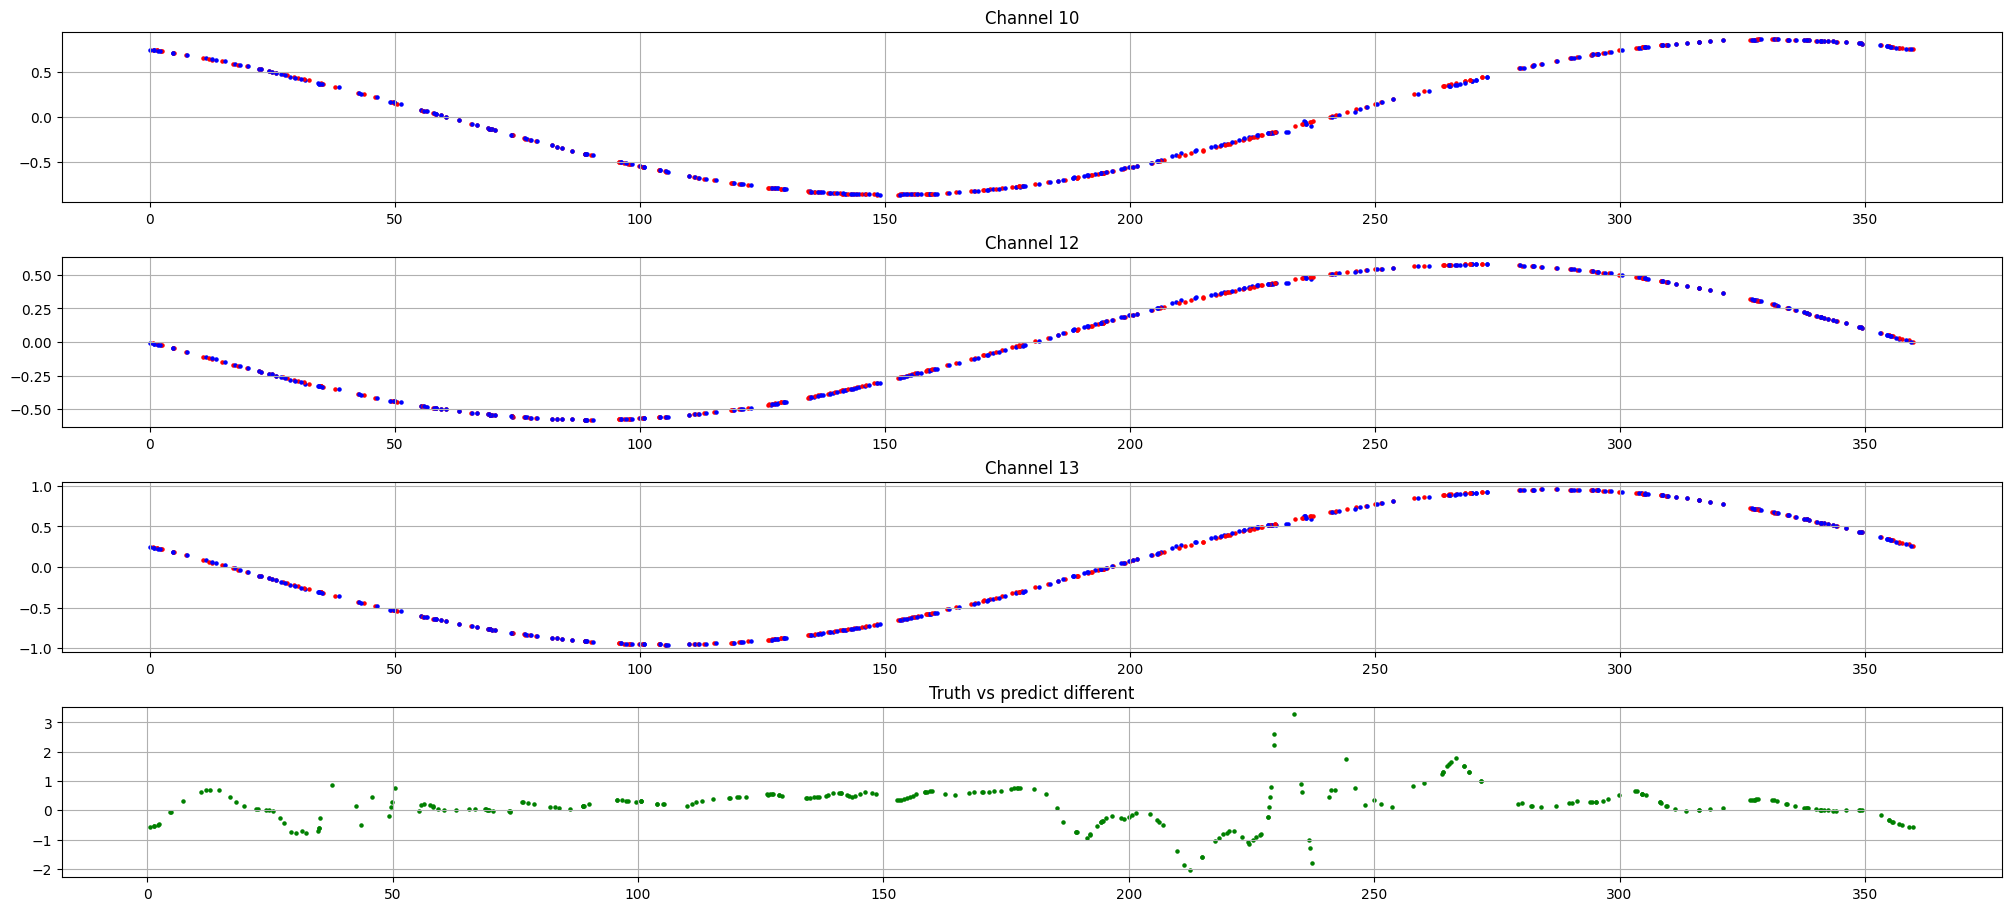

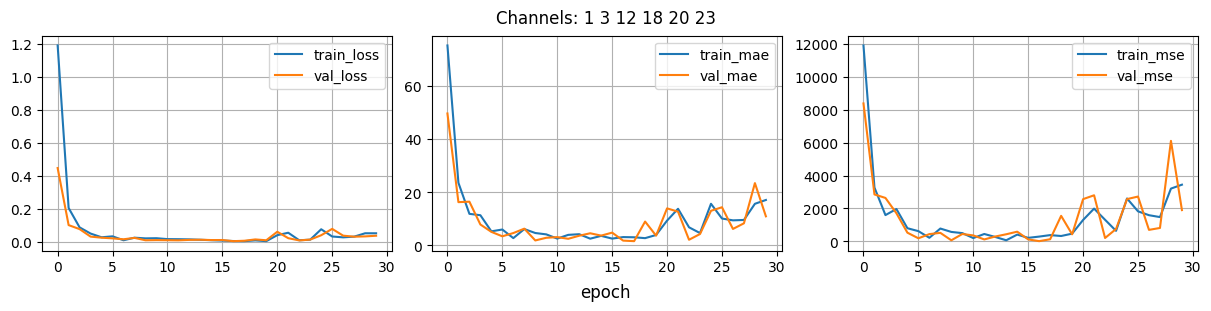

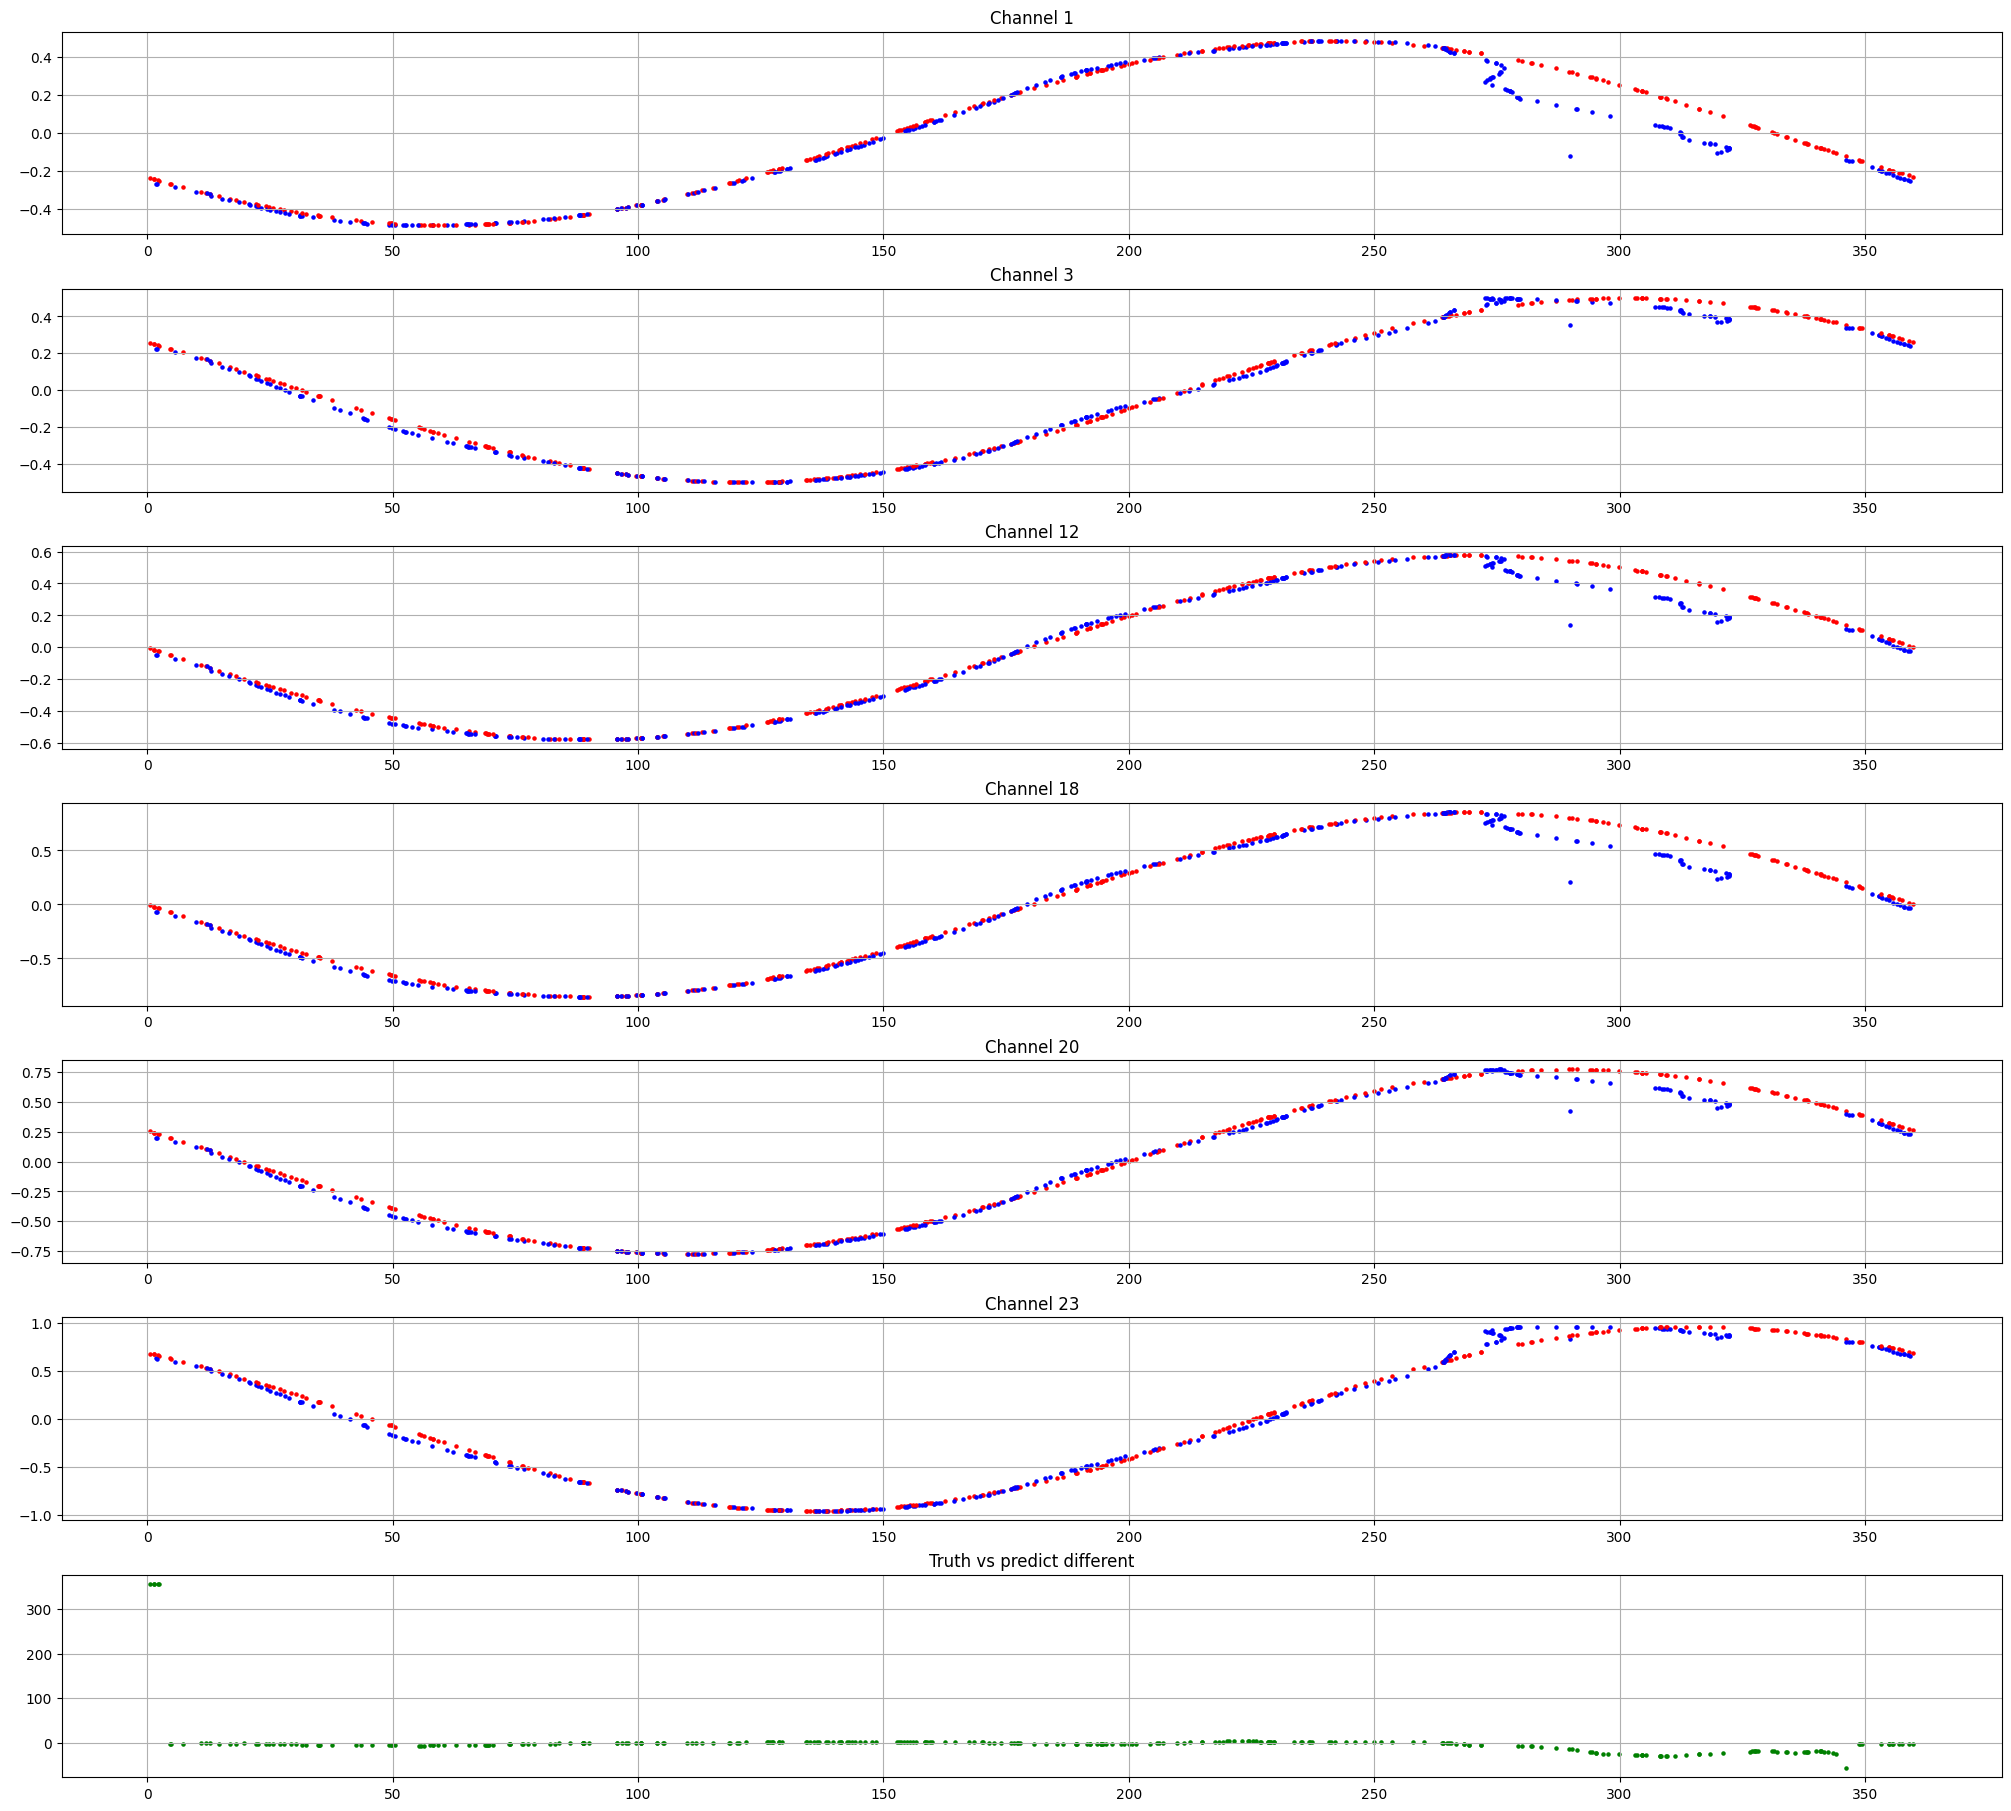

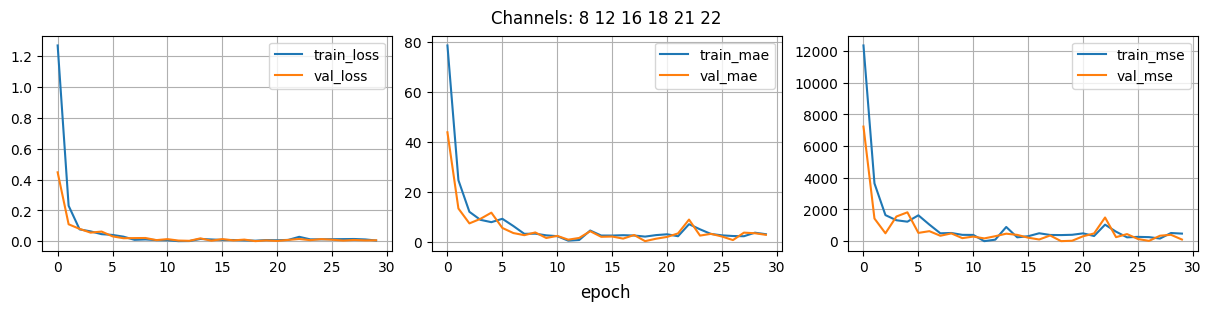

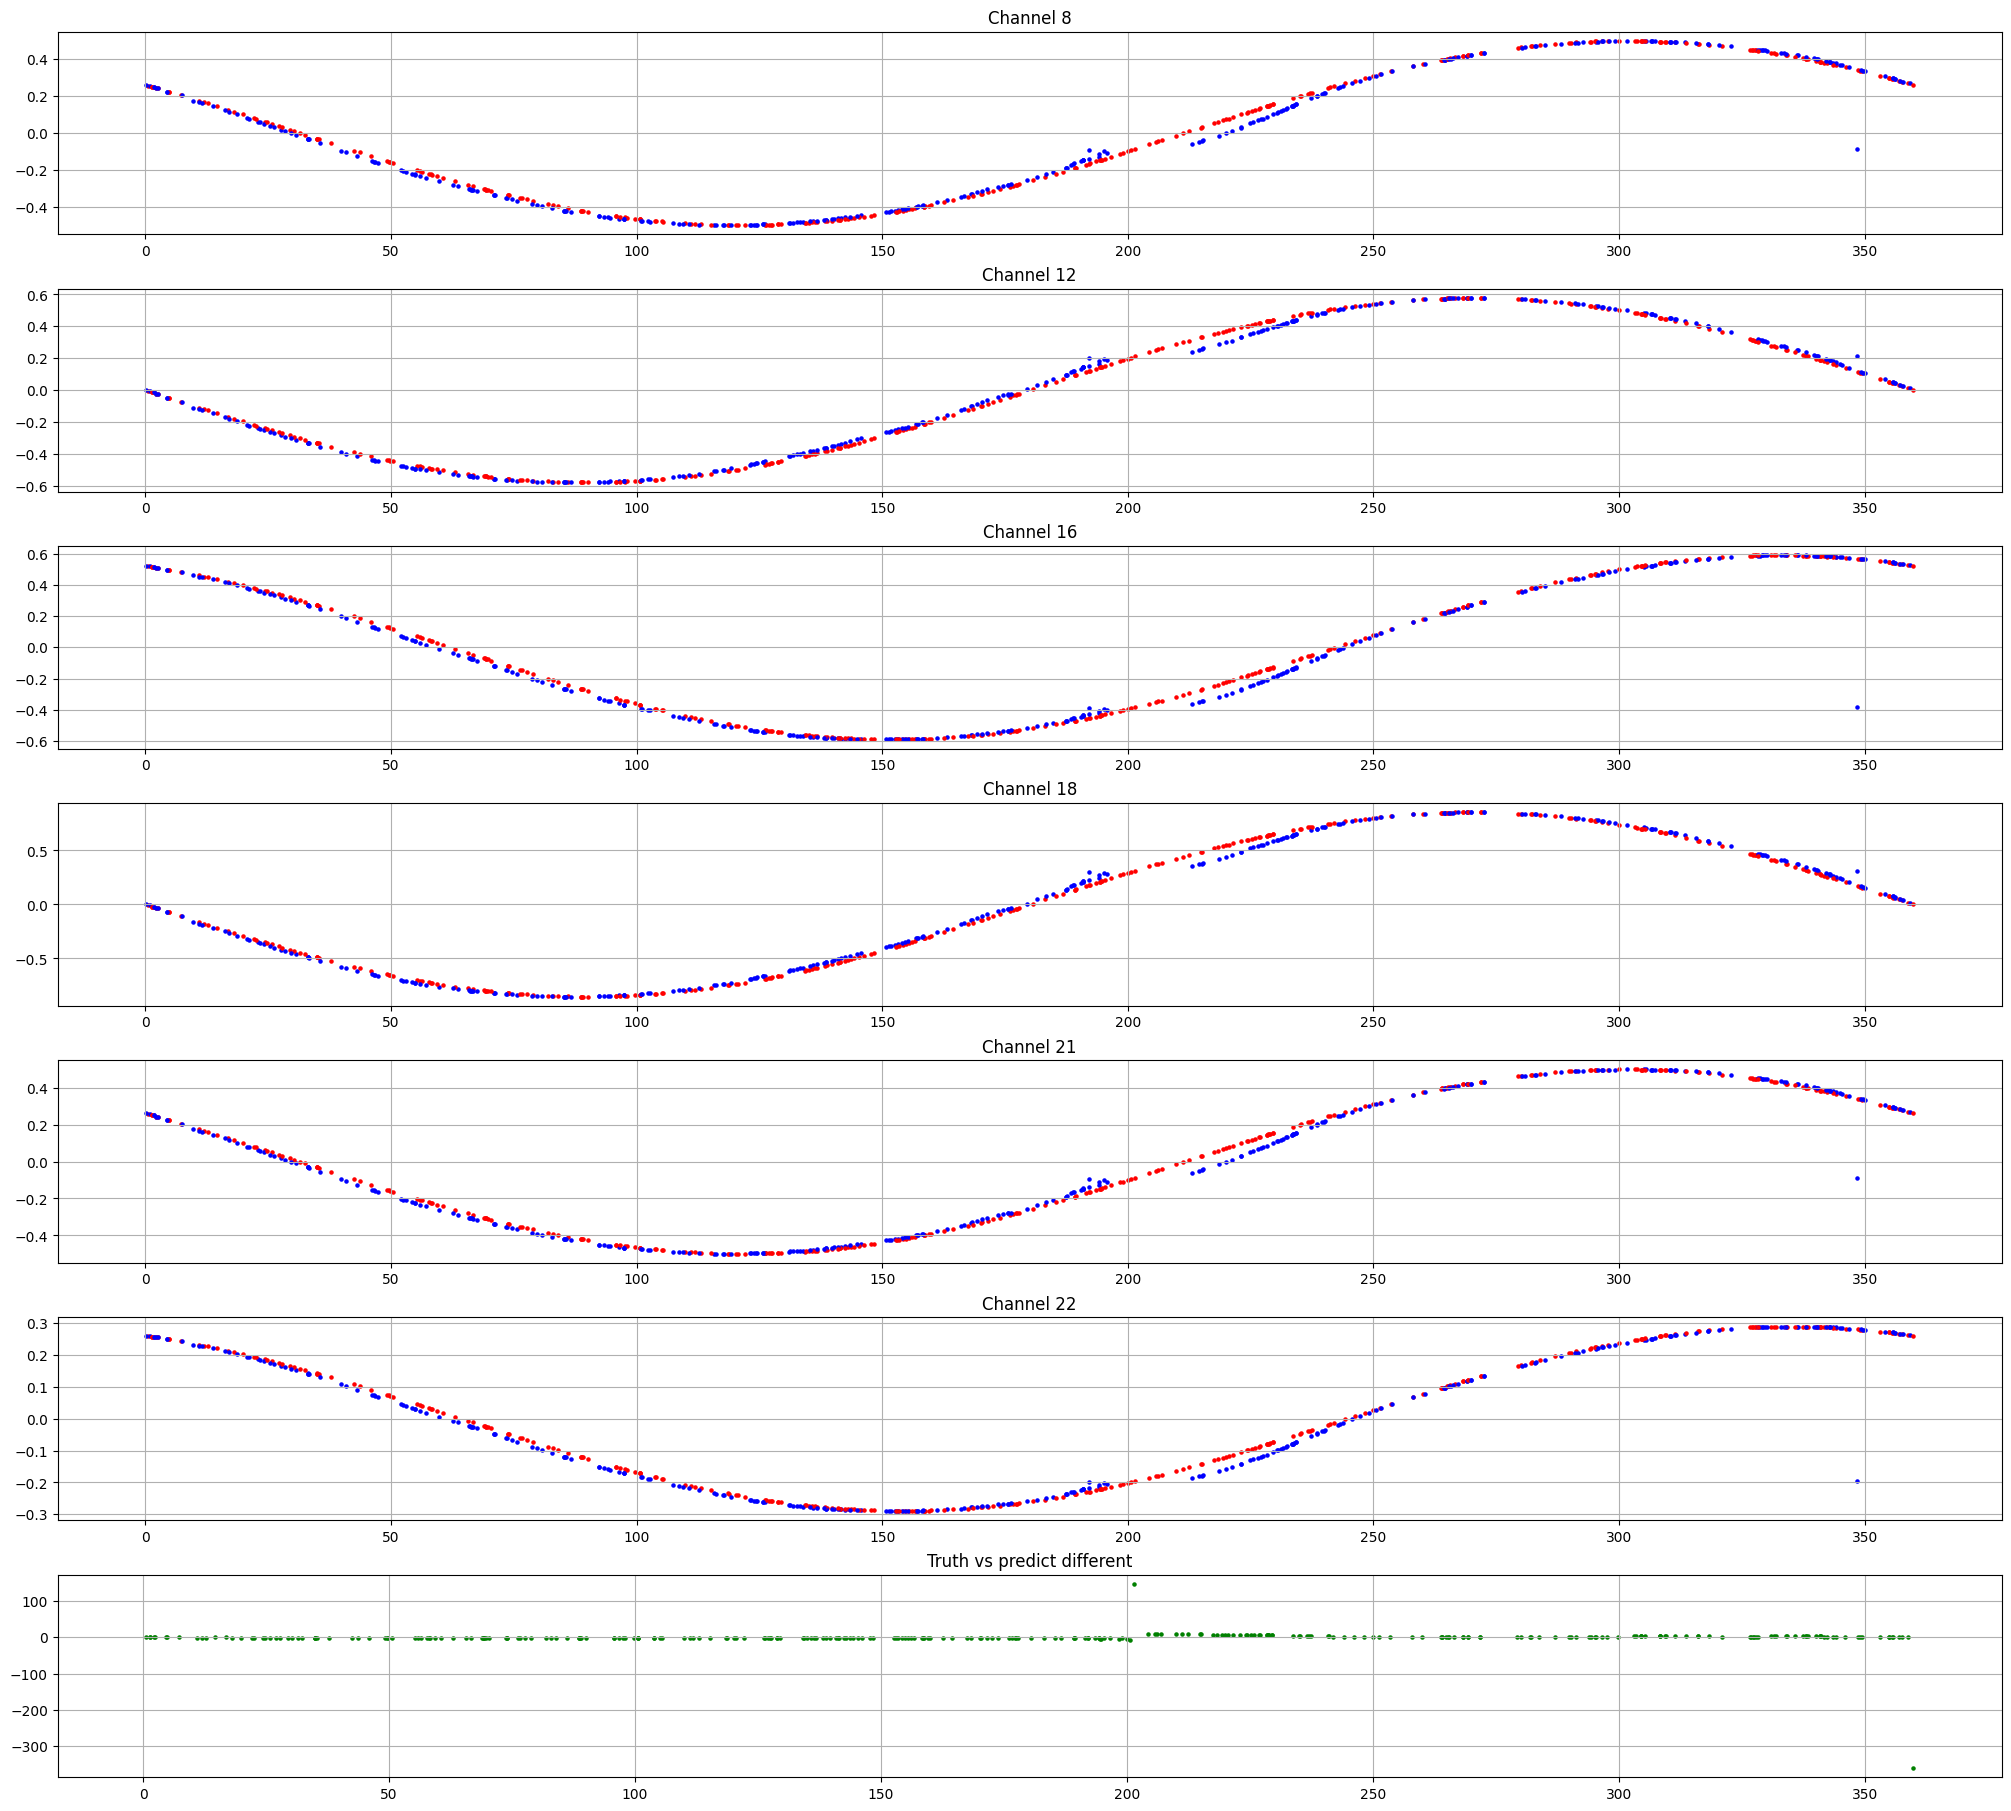

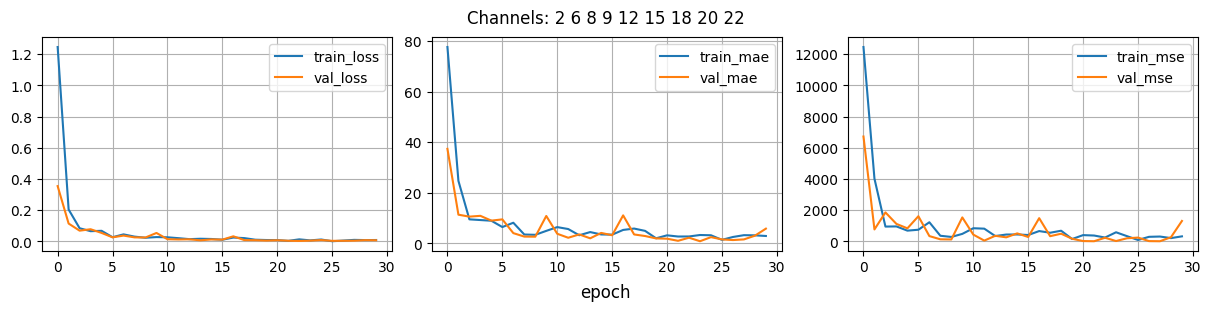

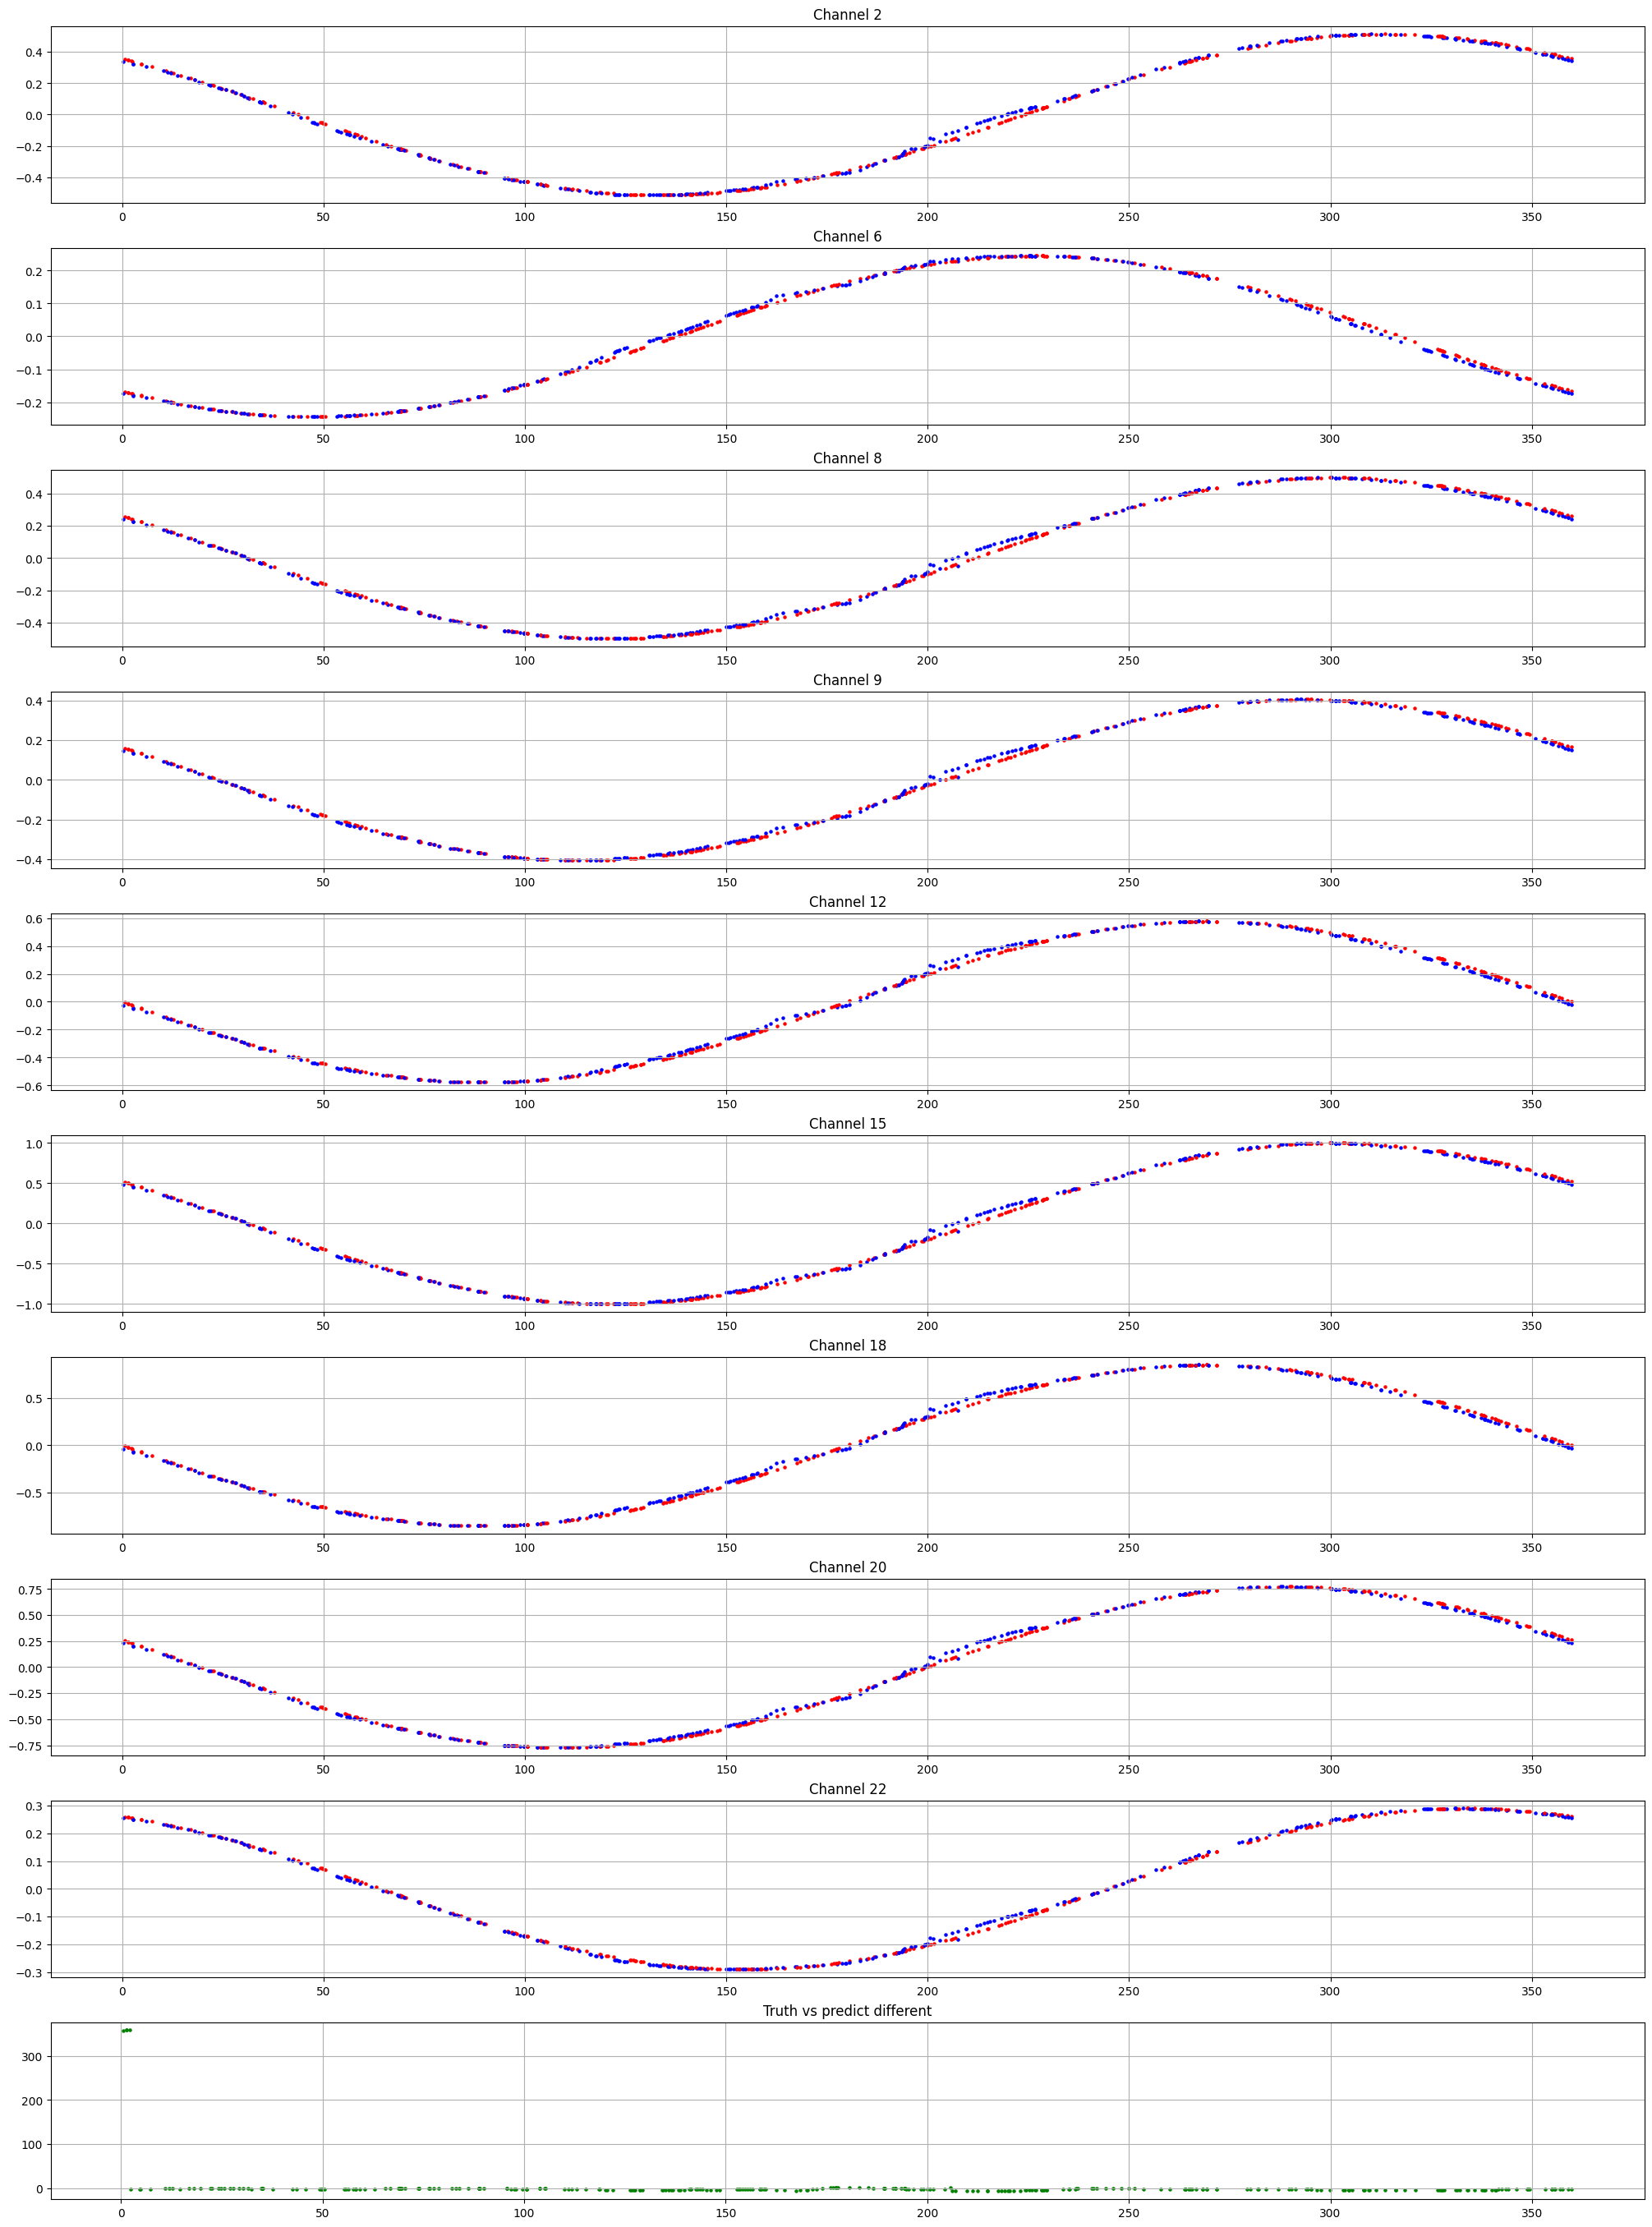

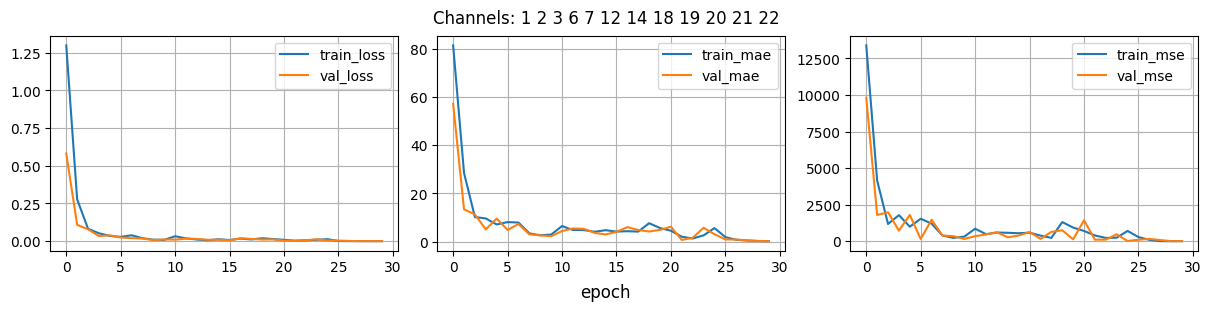

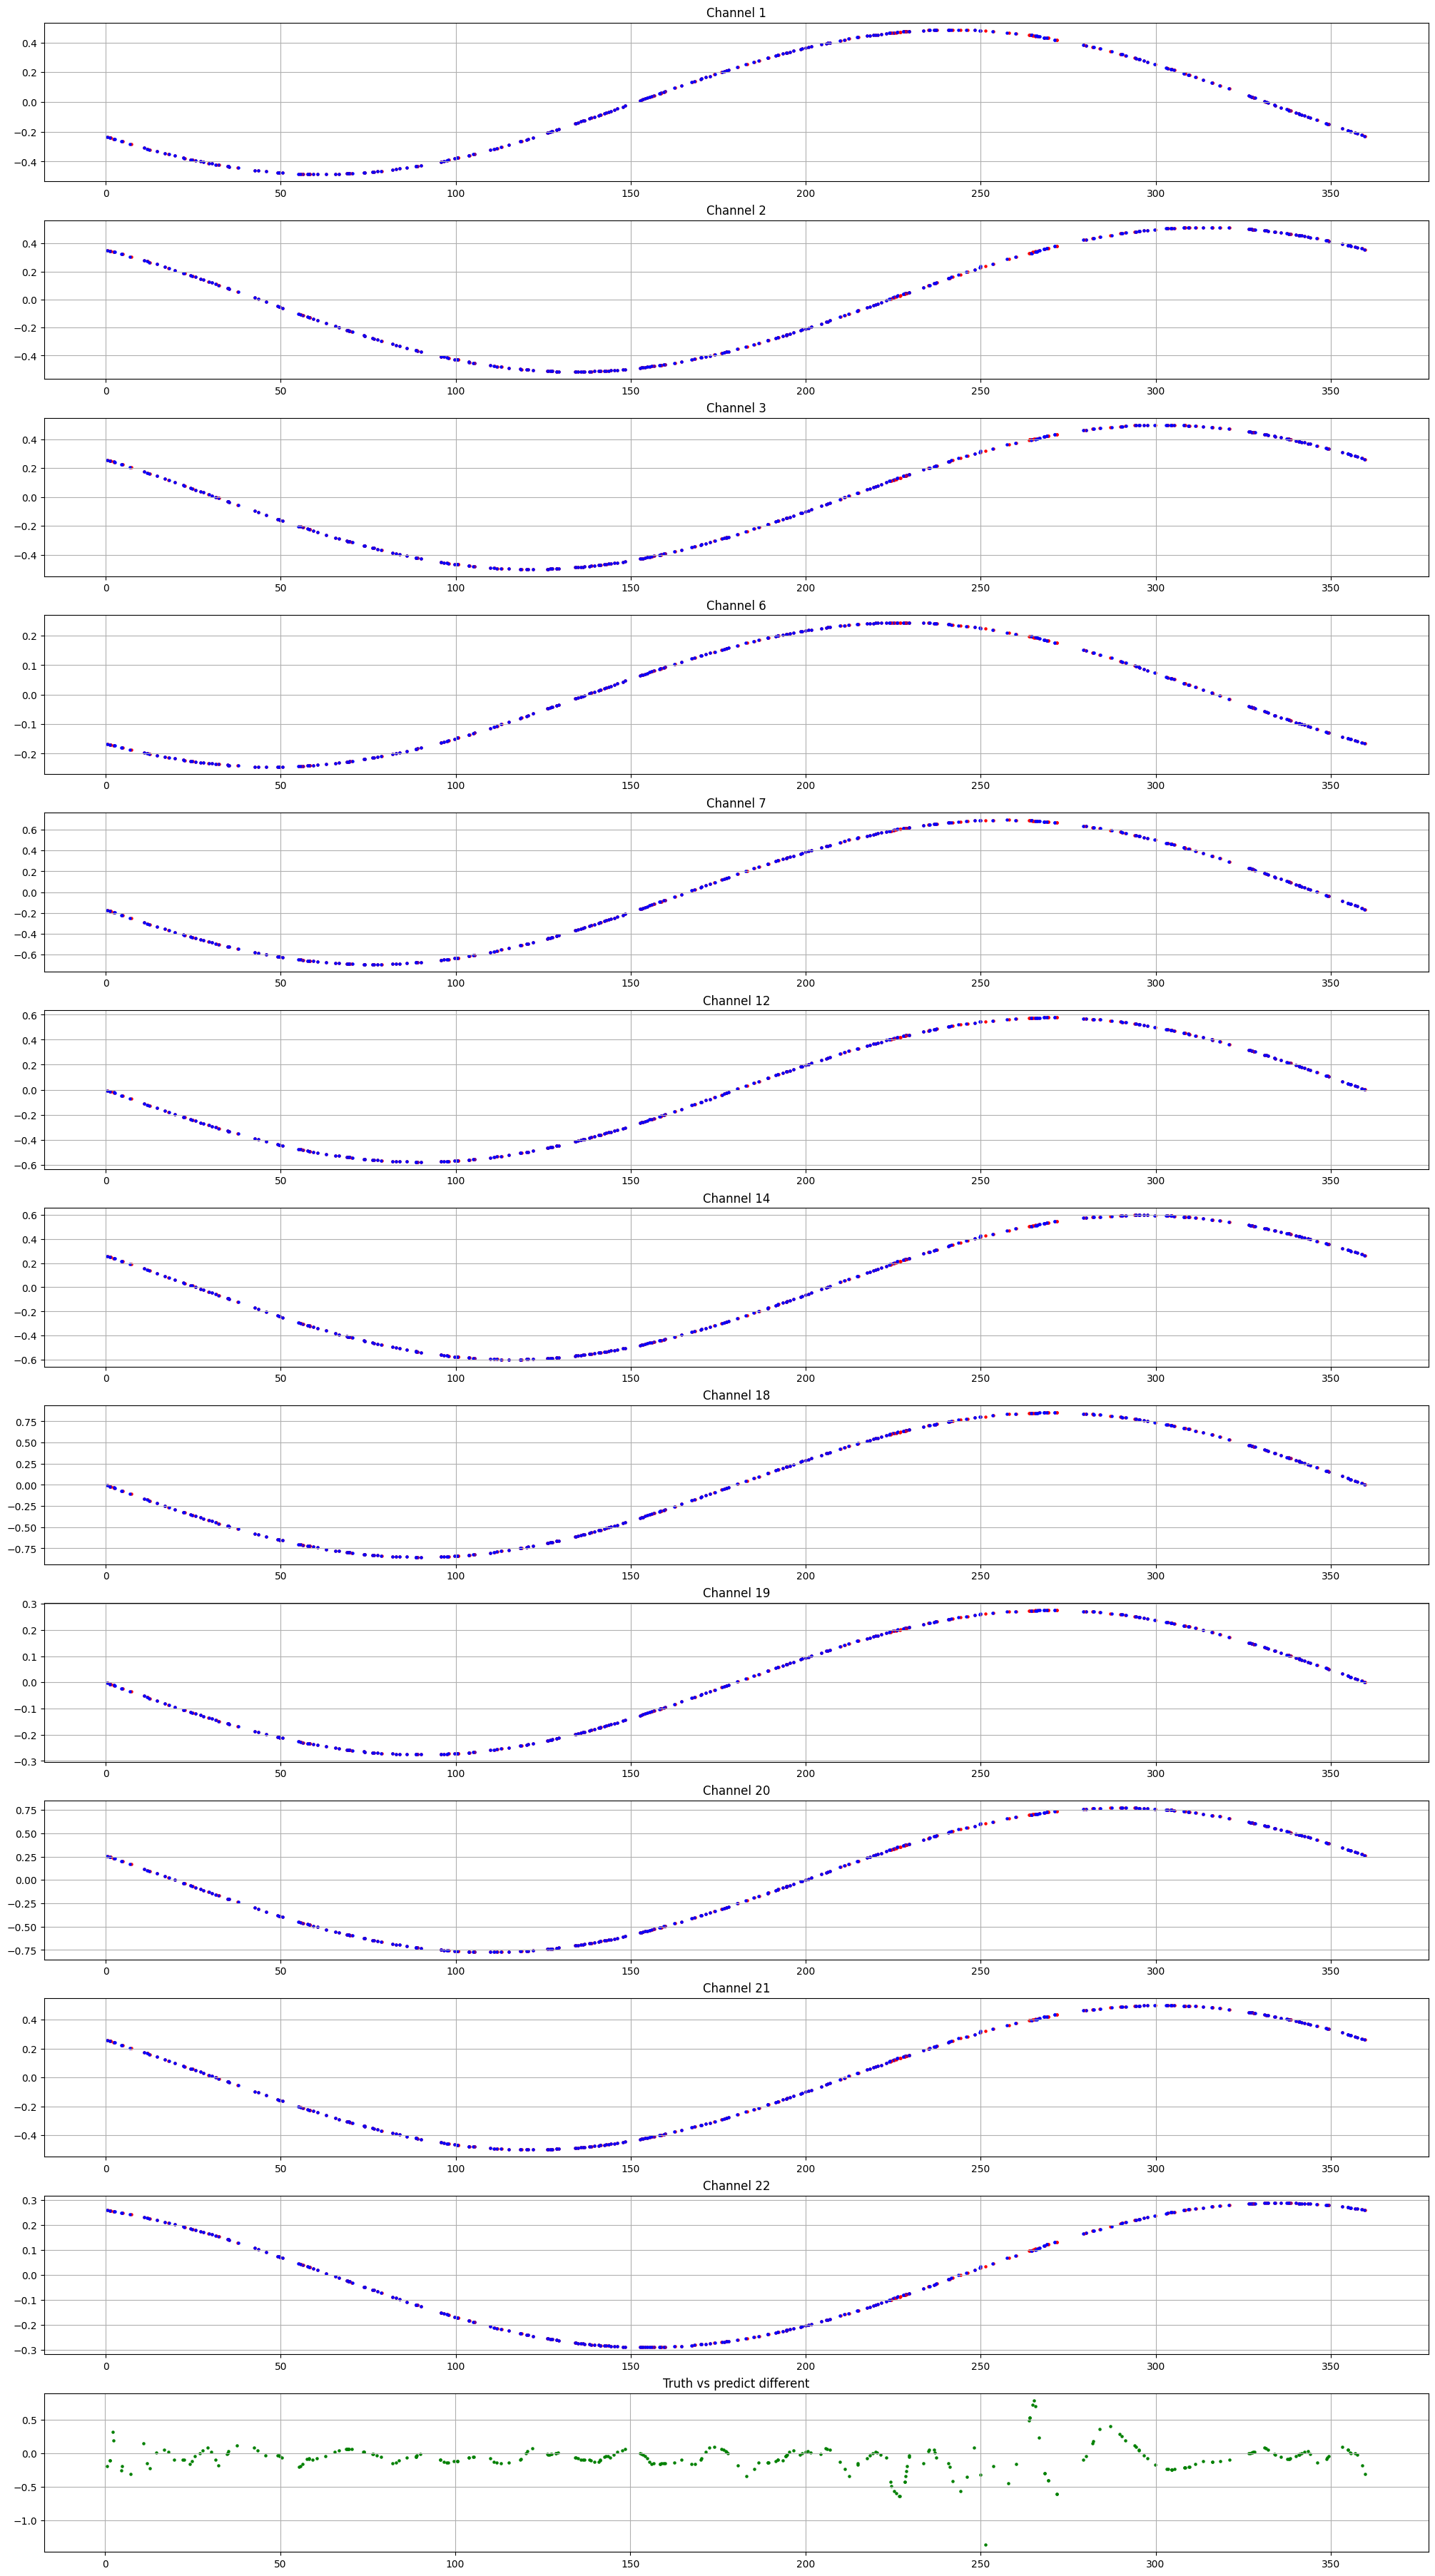

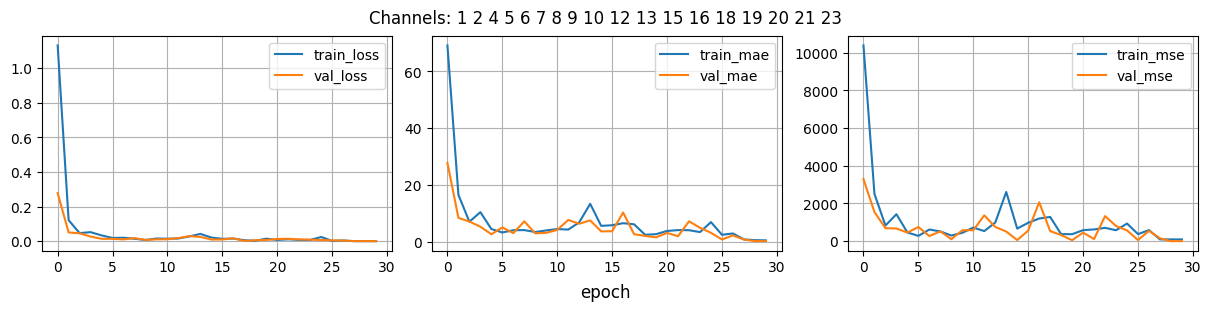

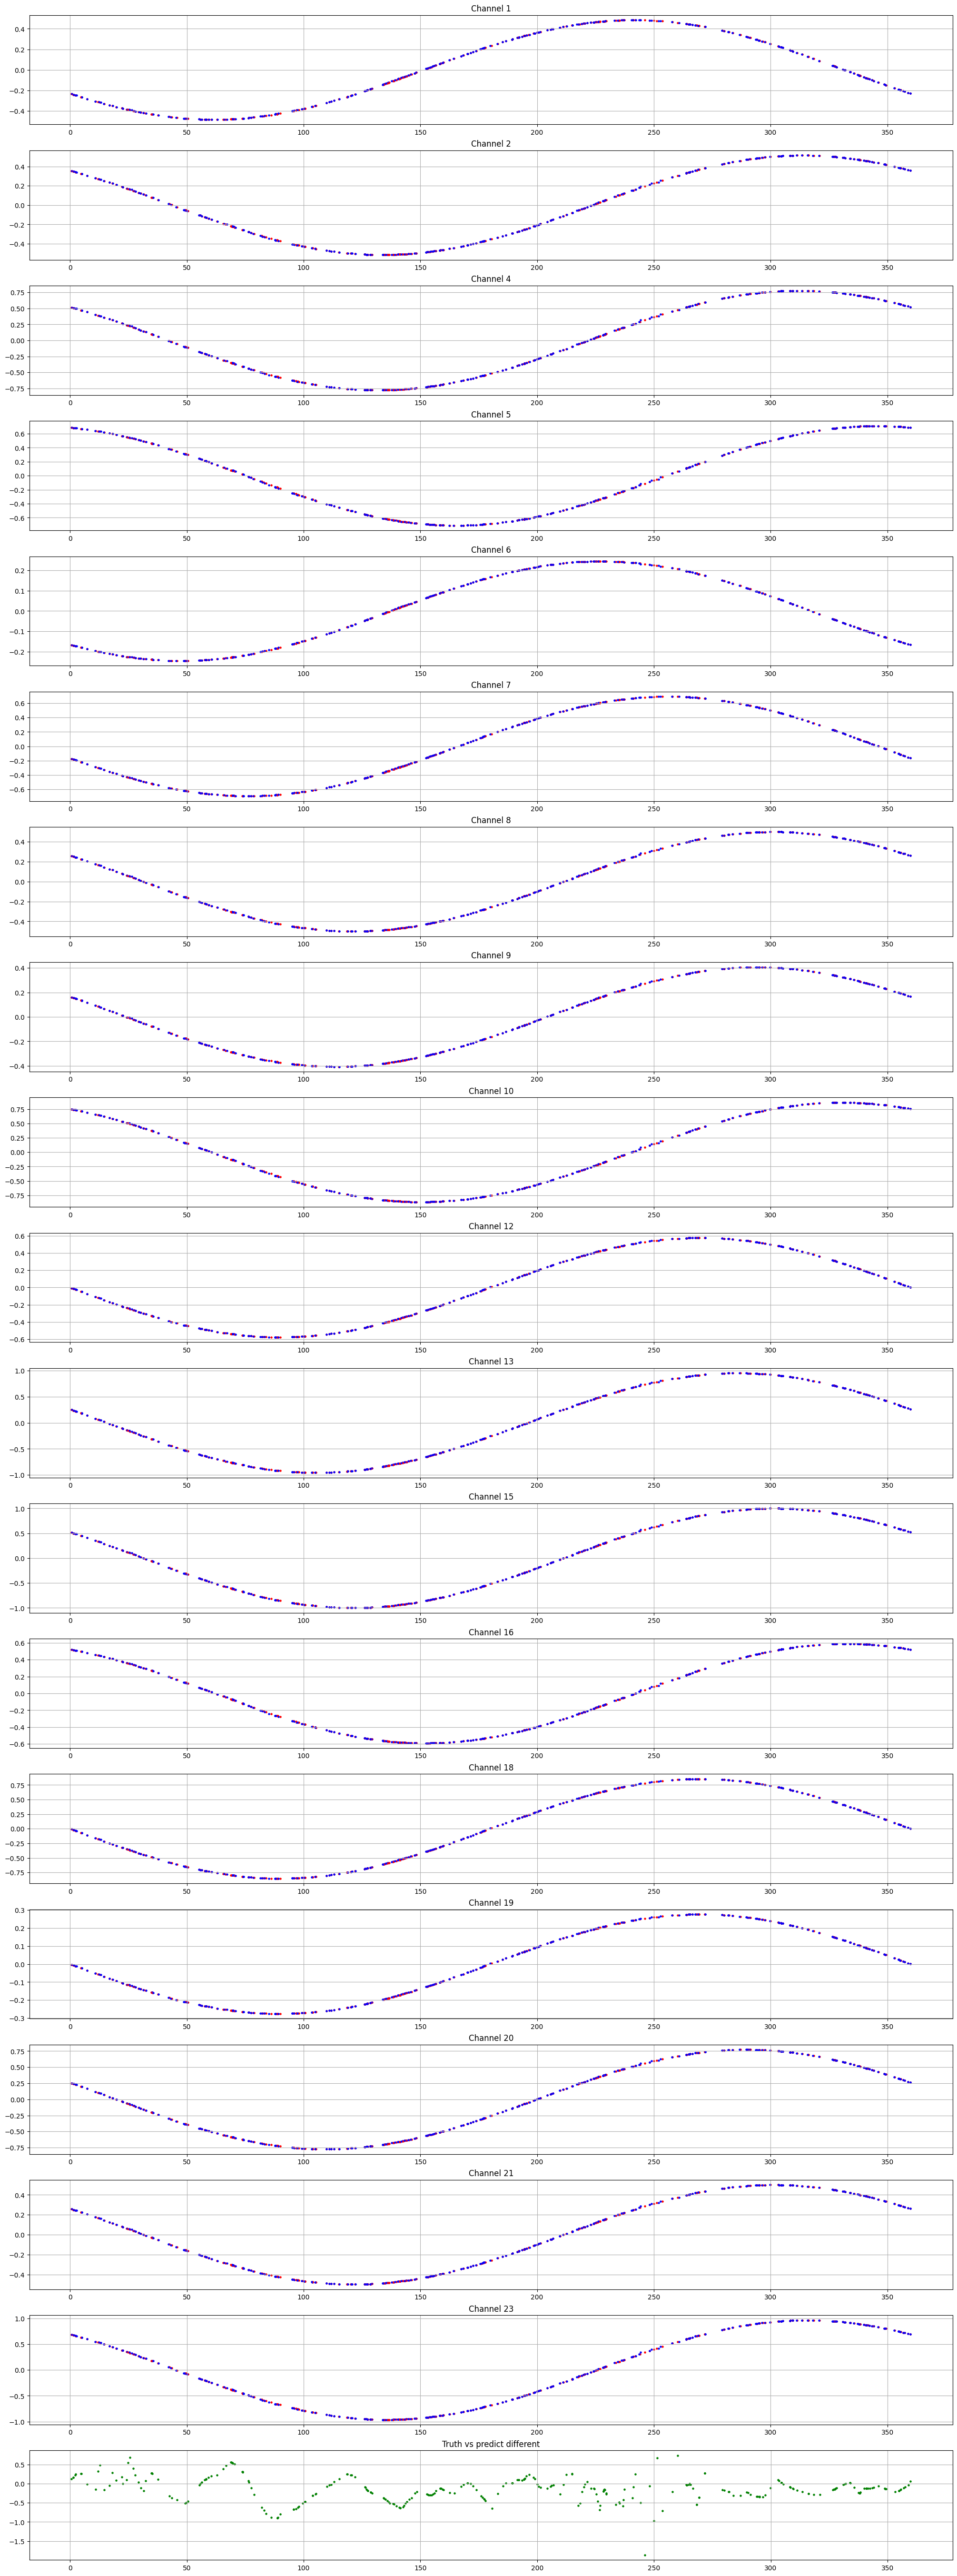

In [153]:
models, evaluates, losses = training_evaluation("relu", top_list_channels, inputs, labels, epochs=30, plot=True)
evaluates